## Import Libraries and Define Variables

In [76]:
#Import Libraries
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
import io
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special
from sklearn import metrics
from sklearn import linear_model
import sklearn.linear_model
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


#defining variables to be used
data1 = np.load('fifa.npz')
data2 = np.load('finance.npz')
data3 = np.load('orbits.npz')

fifa_X_train = data1['train_X']
fifa_X_test = data1['test_X']
fifa_y_train = data1['regression_train_Y']
fifa_y_test = data1['regression_test_Y']
fifa_cls_y_train = data1['classification_train_Y']
fifa_cls_y_test = data1['classification_test_Y']

finance_X_train = data2['train_X']
finance_X_test = data2['test_X']
finance_Y_train = data2['regression_train_Y']
finance_Y_test = data2['regression_test_Y']
finance_cls_y_train = data2['classification_train_Y']
fianace_cls_y_test = data2['classification_test_Y']

orbits_X_train = data3['train_X']
orbits_X_test = data3['test_X']
orbits_Y_train = data3['regression_train_Y']
orbits_Y_test = data3['regression_test_Y']
orbits_cls_y_train = data3['classification_train_Y']
orbits_cls_y_test = data3['classification_test_Y']

## LInear Regression

In [77]:
#function defined to calculate squared error
def cal_mean_square(pred,test):
    sq_err = []
    i=0
    while(i<len(test)):
        x = (pred[i] - test[i])**2
        sq_err.append(x)
        i = i+1
    return sq_err
#linear regression function
def linear_regression():
    print("RESULT ON LINEAR REGRESSION")
    print()
    print()
    #train model on linear regression
    regr1 = linear_model.LinearRegression()
    regr2 = linear_model.LinearRegression()
    regr3 = linear_model.LinearRegression()
    regr1.fit(fifa_X_train, fifa_y_train)
    regr2.fit(finance_X_train, finance_Y_train)
    regr3.fit(orbits_X_train, orbits_Y_train)
    
    #make prediction on test data with trained model
    fifa_y_pred1 = regr1.predict(fifa_X_test)
    fifa_y_pred2 = regr1.predict(fifa_X_train)
    finance_y_pred1 = regr2.predict(finance_X_test)
    finance_y_pred2 = regr2.predict(finance_X_train)
    orbits_y_pred1 = regr3.predict(orbits_X_test)
    orbits_y_pred2 = regr3.predict(orbits_X_train)
    
    #printing Coefficients of each model
    print('Coefficients for fifa data: \n', regr1.coef_)
    print('Coefficients for finance data: \n', regr2.coef_)
    print('Coefficients for orbits data: \n', regr3.coef_)
    
    # Printing variance score for each trained model: 1 is perfect prediction
    print()
    print('Variance score for fifa test set: %.2f' % r2_score(fifa_y_test, fifa_y_pred1))
    print('Variance score for fifa train set: %.2f' % r2_score(fifa_y_train, fifa_y_pred2))
    print('Variance score for finance test set: %.2f' % r2_score(finance_Y_test, finance_y_pred1))
    print('Variance score for finance train set: %.2f' % r2_score(finance_Y_train, finance_y_pred2))
    print('Variance score for orbits test set: %.2f' % r2_score(orbits_Y_test, orbits_y_pred1))
    print('Variance score for orbits train set: %.2f' % r2_score(orbits_Y_train, orbits_y_pred2))

    #Calculating squared error on each point on test data set
    fifa_sq_err = cal_mean_square(fifa_y_pred1,fifa_y_test)
    finance_sq_err = cal_mean_square(finance_y_pred1,finance_Y_test)
    orbits_sq_err = cal_mean_square(orbits_y_pred1,orbits_Y_test)
    
    #Plotting Histogram
    plt.title("FIFA")
    plt.ylabel('frequency')
    plt.xlabel('squared error')
    arrays, bins, patches = plt.hist(fifa_sq_err, bins=300)
    plt.show()
    plt.title("FINANCE")
    plt.ylabel('frequency')
    plt.xlabel('squared error')
    arrays, bins, patches = plt.hist(finance_sq_err, bins=300)
    plt.show()
    plt.title("ORBITS")
    plt.ylabel('frequency')
    plt.xlabel('squared error')
    arrays, bins, patches = plt.hist(finance_sq_err, bins=300)
    plt.show()

## Logistic Regression

In [78]:
#function to draw graph
def plot_log_reg(x, y, title, clf, xmin=None, xmax=None, alpha=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ax.set_title(title)
    ax.scatter(x, y, color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax,300)
    loss = scipy.special.expit(X_test * clf.coef_[0][0] + clf.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    fig.tight_layout()
    return fig, ax

#function to draw confusion matrix
def draw_confusion(test, pred,title):
    cm = metrics.confusion_matrix(test, pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # drawing confusion matrix using matplotlib
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 10)
    plt.xlabel('Predicted label', size = 10)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')

#function to do logistic regression
def logistic_regression():
    print("RESULT ON LOGISTIC REGRESSION")
    print()
    print()
    
    #Create model on each data set and present parameter setting
    clf_sgd_fifa = sklearn.linear_model.SGDClassifier(random_state = None, loss = 'log', max_iter=50, tol=1e-3, verbose=1,eta0=0.06,early_stopping = False)
    print("Model Setting on fifa data set:")
    print(clf_sgd_fifa.get_params([True]))
    print()
    clf_sgd_finance = sklearn.linear_model.SGDClassifier(random_state = None, loss = 'log', max_iter=50, tol=1e-3, verbose=1,eta0=0.06,early_stopping = False)
    print("Model Setting on finance data set:")
    print(clf_sgd_finance.get_params([True]))
    print()
    clf_sgd_orbits = sklearn.linear_model.SGDClassifier(random_state = None, loss = 'log', max_iter=50, tol=1e-3, verbose=1,eta0=0.06,early_stopping = False)
    print("Model Setting on orbits data set:")
    print(clf_sgd_orbits.get_params([True]))
    print()
    
    #Fit training data on each model
    print("Fitting fifa model")
    clf_sgd_fifa.fit(fifa_X_train, fifa_cls_y_train)
    print()
    print("Fitting finance model")
    clf_sgd_finance.fit(finance_X_train, finance_cls_y_train)
    print()
    print("Fitting Orbits model")
    clf_sgd_orbits.fit(orbits_X_train, orbits_cls_y_train)
    print()
    
    #print intercept and coefficents of models
    print('fifa_model_intercept:',clf_sgd_fifa.intercept_)
    print('fifa_model_coef:', clf_sgd_fifa.coef_)
    print()
    print('finance_model_intercept:',clf_sgd_finance.intercept_)
    print('finance_model_coef:', clf_sgd_finance.coef_)
    print()
    print('orbits_model_intercept:',clf_sgd_orbits.intercept_)
    print('orbits_model_coef:', clf_sgd_orbits.coef_)
    print()
    
    #Comparing Mean Accuracy of model on training and testing sets
    score_fifa_train = clf_sgd_fifa.score(fifa_X_train,fifa_cls_y_train)
    score_fifa_test = clf_sgd_fifa.score(fifa_X_test,fifa_cls_y_test)
    score_finance_train = clf_sgd_finance.score(finance_X_train,finance_cls_y_train)
    score_finance_test = clf_sgd_finance.score(finance_X_test,fianace_cls_y_test)
    score_orbits_train = clf_sgd_orbits.score(orbits_X_train,orbits_cls_y_train)
    score_orbits_test = clf_sgd_orbits.score(orbits_X_test,orbits_cls_y_test)
    print("Mean Accuracy of fifa training set is {0} and test set is {1}  ".format(score_fifa_train, score_fifa_test))
    print("Mean Accuracy of finance training set is {0} and test set is {1}  ".format(score_finance_train, score_finance_test))
    print("Mean Accuracy of orbits training set is {0} and test set is {1}  ".format(score_orbits_train, score_orbits_test))
    print()
    
    #Drawing confusion matrix to visualize and compare on both training and test set
    prediction_fifa_train = clf_sgd_fifa.predict(fifa_X_train)
    prediction_fifa_test = clf_sgd_fifa.predict(fifa_X_test)
    prediction_finance_train = clf_sgd_finance.predict(finance_X_train)
    prediction_finance_test = clf_sgd_finance.predict(finance_X_test)
    prediction_orbits_train = clf_sgd_orbits.predict(orbits_X_train)
    prediction_orbits_test = clf_sgd_orbits.predict(orbits_X_test)
    
    draw_confusion(fifa_cls_y_train,prediction_fifa_train,"Confusion Matrix of FIFA train set")
    draw_confusion(fifa_cls_y_test,prediction_fifa_test,"Confusion Matrix of FIFA test set")
    draw_confusion(finance_cls_y_train,prediction_finance_train,"Confusion Matrix of FINANACE train set")
    draw_confusion(fianace_cls_y_test,prediction_finance_test,"Confusion Matrix of FINANCE test set")
    draw_confusion(orbits_cls_y_train,prediction_orbits_train,"Confusion Matrix of ORBITS train set")
    draw_confusion(orbits_cls_y_test,prediction_orbits_test,"Confusion Matrix of ORBITS test set")



##  Neural Network Model

In [79]:
# Visualize the results of hyperparameter tuning
def plot_grid_search(cv_results, grid_param, name_param):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_sd = cv_results['std_test_score']

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    lst = []
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for cnt in range(len(grid_param)):
        s = str(grid_param[cnt])
        lst.append(s)
        print("Setting", cnt, ': ', s, 'test score:', round(scores_mean[cnt],3))
        
    ax.plot([1,2,3,4,5,6,7,8,9,10], scores_mean, '-o', label= 'test score')

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)

    ax.grid('off')

#function used to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def neural_network(trainx,trainy,testx,testy,title):
    #10 hyperparameters and going to choose best one out of them
    tuned_parameters = [{'hidden_layer_sizes':[(1, )], 'learning_rate':['constant'], 'learning_rate_init':[0.01]},
                        {'hidden_layer_sizes':[(2, )],'learning_rate':['constant'], 'learning_rate_init':[0.01]},
                        {'hidden_layer_sizes':[(3, )],'learning_rate':['constant'], 'learning_rate_init':[0.01]},
                        {'hidden_layer_sizes':[(4, )],'learning_rate':['constant'], 'learning_rate_init':[0.01]},
                        {'hidden_layer_sizes':[(5, )],'learning_rate':['constant'], 'learning_rate_init':[0.01]},
                        {'hidden_layer_sizes':[(6, )],'learning_rate':['constant'], 'learning_rate_init':[0.01]},
                        {'hidden_layer_sizes':[(7, )],'learning_rate':['constant'], 'learning_rate_init':[0.01]},
                        {'hidden_layer_sizes':[(8, )],'learning_rate':['constant'], 'learning_rate_init':[0.01]},
                        {'hidden_layer_sizes':[(9, )],'learning_rate':['constant'], 'learning_rate_init':[0.01]},
                        {'hidden_layer_sizes':[(10, )],'learning_rate':['constant'], 'learning_rate_init':[0.01]}]
    
    scores = ['precision', 'recall']
    #cross validation performed to determine the best hyperparameter
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        
        mlp =MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', verbose=True, tol=1e-4, random_state=1,early_stopping = True)
        clf = GridSearchCV(mlp, tuned_parameters, cv=5, scoring='%s_macro' % score)
        clf.fit(trainx, trainy)
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)

        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        print()
        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = testy, clf.predict(testx)
        print(classification_report(y_true, y_pred))
        print()
    
    #plot the cross validation result    
    plot_grid_search(clf.cv_results_, clf.cv_results_['params'], 'N Estimators')
    
    #train the model with full training set and show the best loss score before overfitting happens
    best_para = clf.best_params_['hidden_layer_sizes']
    mlp =MLPClassifier(hidden_layer_sizes=best_para, learning_rate='constant', learning_rate_init=0.001, max_iter=300, alpha=1e-4, solver='sgd', verbose=True, tol=1e-4, random_state=1,early_stopping = True)
    
    #to get the model setting
    print()
    print("Parameter setting for MLPClassifier {0}".format(title))
    print()
    print(mlp.get_params([True]))
    print()
    
    #to calculate best loss on test set
    mlp.fit(testx, testy)
    testloss = mlp.loss_
    mlp.fit(trainx,trainy)
    print()
    print("Best loss before overfitting for train set is {0}".format(mlp.loss_))
    print("Best loss before overfitting for test set is {0}".format(testloss))
    
    #Classification of training and test set visualized in mean accuracy and confusion matrix
    print()
    print("Experiment results on {0} data set ".format(title))
    train_score = mlp.score(trainx,trainy)
    test_score = mlp.score(testx,testy)
    print()
    print("Mean accuracy score of {0} data training set is {1} and test set is {2}".format(title,train_score,test_score))
    train_predict = mlp.predict(trainx)
    test_predict = mlp.predict(testx)
    draw_confusion(trainy,train_predict,"Confusion Matrix of {0} train set".format(title))
    draw_confusion(testy,test_predict,"Confusion Matrix of {0} test set".format(title))
    
    #plot the learning curve to show performance change over time
    title = "Learning Curves (Naive Bayes)"
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    estimator = GaussianNB()
    plot_learning_curve(mlp, title, trainx, trainy, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
    title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = SVC(gamma=0.001)
    plot_learning_curve(mlp, title, trainx, trainy, (0.1, 1.01), cv=cv, n_jobs=4)
    plt.show()

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


RESULT ON LINEAR REGRESSION


Coefficients for fifa data: 
 [ 0.03399686  0.04065948  0.33711262  0.03674203  0.01062253 -0.03126748
  0.08024437  0.00718437  0.38491537 -0.09337459  0.01337158 -0.00555847
  0.0932485   0.0240375   0.13463164 -0.03372189  0.05278269  0.07175846
  0.01169029  0.05833306 -0.03632139  0.01477842  0.0214001   0.17791538
  0.04308956  0.05216685 -0.04791237  0.01951092  0.01191993  0.00530322
 -0.01100853  0.16475427  0.10985266  0.06221     0.15169826  0.14792519]
Coefficients for finance data: 
 [ 5.75891954e-07 -8.30751352e-03 -1.44806424e-06 -3.14430984e-07
  6.27226369e-01 -8.30700307e-03  6.53285883e-07 -5.90441640e-01
  1.41027165e-06 -9.52657736e-07 -4.16345864e-07 -1.50792798e-06
  8.85336886e-07 -3.87782917e-07 -5.25868567e-08  2.34670621e-07
  1.11496115e-07 -3.93217778e-06  6.86028847e-07 -6.75262127e-07
  7.03916463e-07 -4.97937062e-07  3.87218032e-06  6.56319538e-07
  3.55064139e-07  4.39154209e-07]
Coefficients for orbits data: 
 [-8.79094937

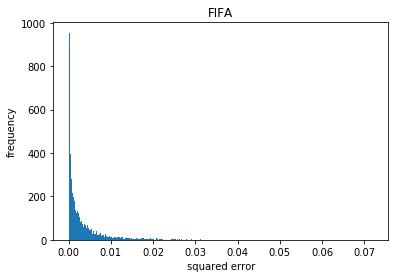

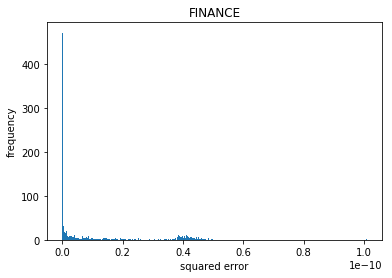

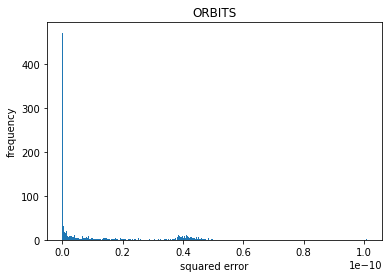

Overall running clock (process time) : 1.939
Overall running time (wall time) : 1.767


/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [80]:
#to run the linear regression method and measure time taken
if __name__ == "__main__":
    start_clock_linear = time.clock()
    start_time_linear = time.time()
    linear_regression()
    end_clock_linear = time.clock()
    end_time_linear = time.time()
    print("Overall running clock (process time) :", round(end_clock_linear - start_clock_linear,3))
    print("Overall running time (wall time) :", round(end_time_linear - start_time_linear, 3))

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


RESULT ON LOGISTIC REGRESSION


Model Setting on fifa data set:
{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.06, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 50, 'n_iter': None, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}

Model Setting on finance data set:
{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.06, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 50, 'n_iter': None, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}

Model Setting on orbits data set:
{'alpha': 0.0001, 'average': Fa

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Overall running clock (process time) : 0.73
Overall running time (wall time) : 0.494


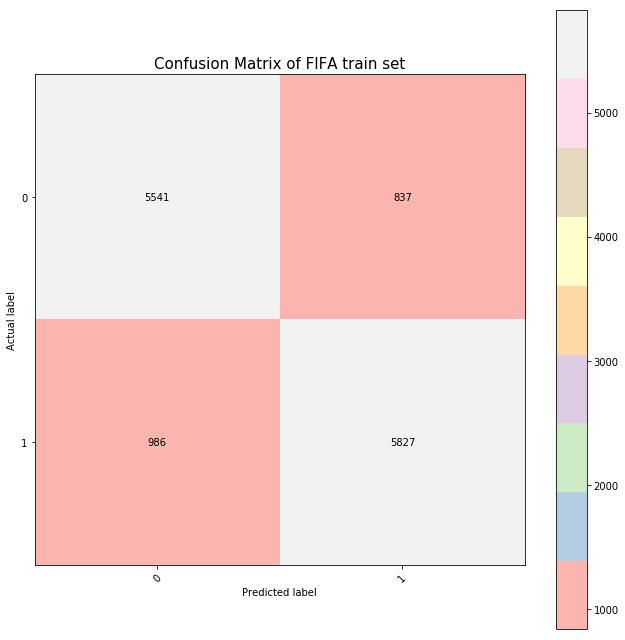

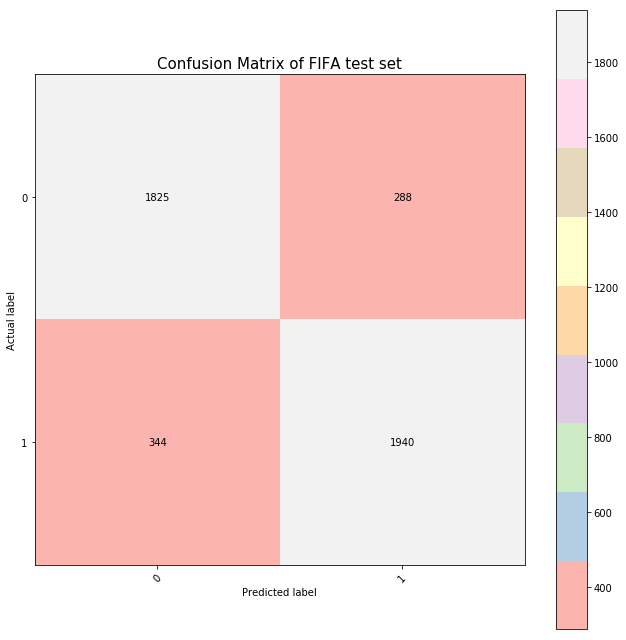

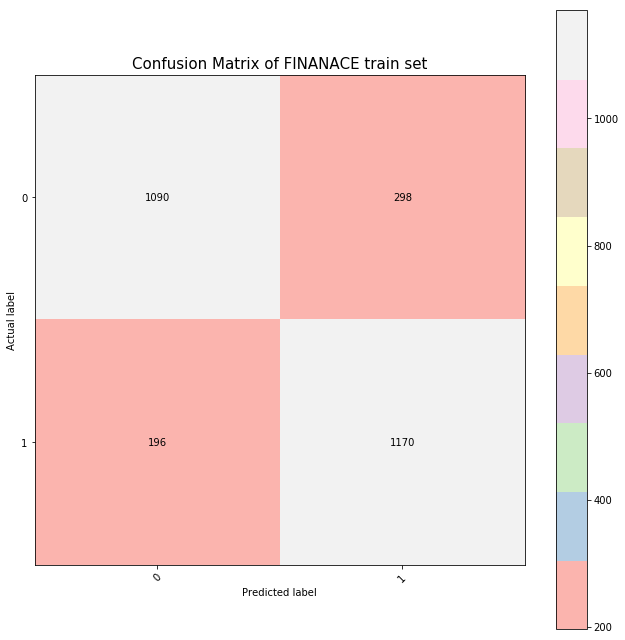

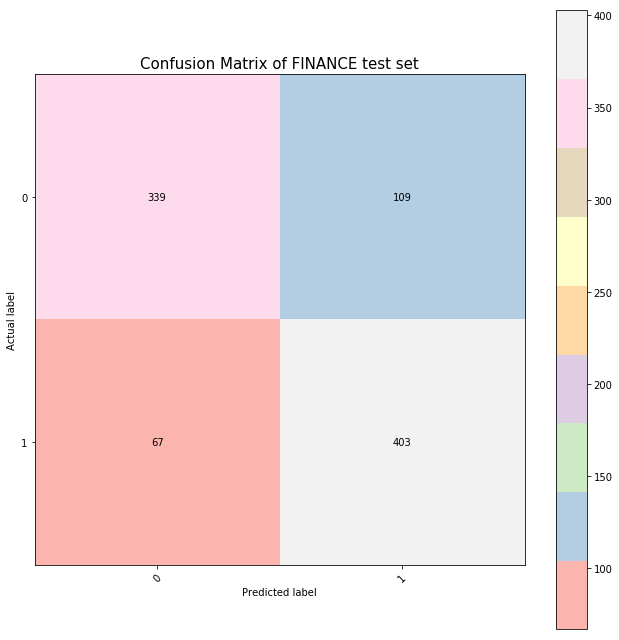

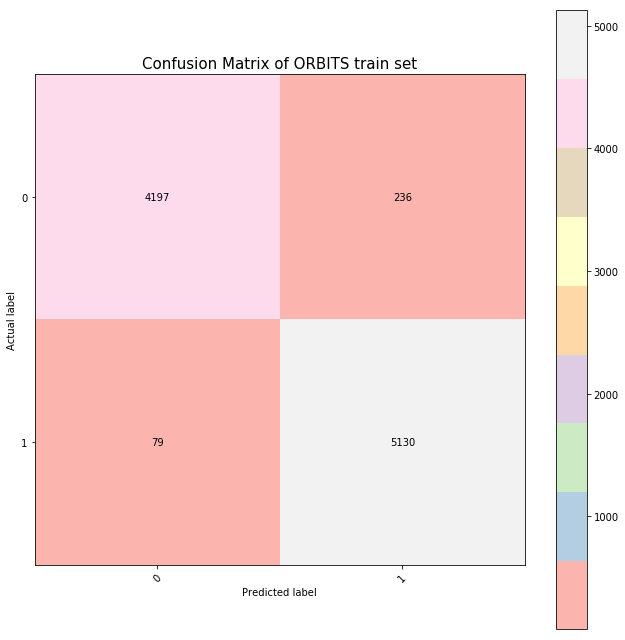

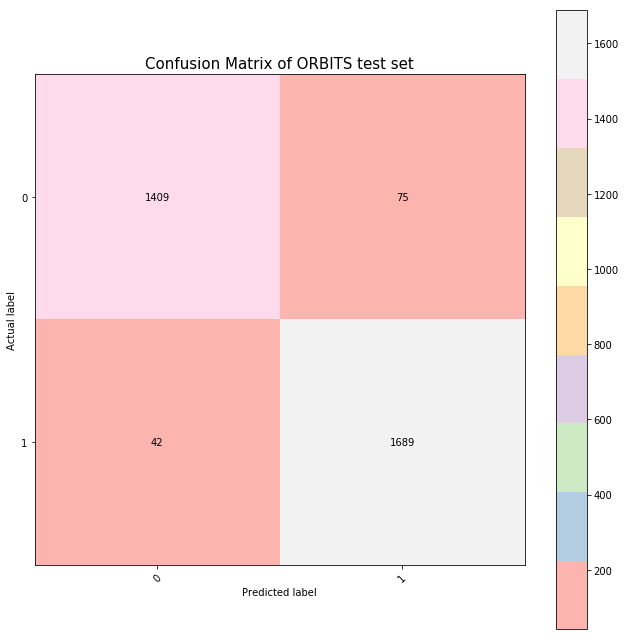

In [81]:
#to run the logistic regression and measure the time taken
if __name__ == "__main__":   
    start_clock_logistic = time.clock()
    start_time_logistic = time.time()
    logistic_regression()
    end_clock_logistic = time.clock()
    end_time_logistic = time.time()   
    print("Overall running clock (process time) :", round(end_clock_logistic - start_clock_logistic,3))
    print("Overall running time (wall time) :", round(end_time_logistic - start_time_logistic, 3))
    

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


# Tuning hyper-parameters for precision

Iteration 1, loss = 0.83103930
Validation score: 0.426136
Iteration 2, loss = 0.64649886
Validation score: 0.732955
Iteration 3, loss = 0.57919998
Validation score: 0.780303
Iteration 4, loss = 0.53905445
Validation score: 0.800189
Iteration 5, loss = 0.51038690
Validation score: 0.804924
Iteration 6, loss = 0.48632927
Validation score: 0.815341
Iteration 7, loss = 0.46495588
Validation score: 0.829545
Iteration 8, loss = 0.44699644
Validation score: 0.832386
Iteration 9, loss = 0.43208231
Validation score: 0.832386
Iteration 10, loss = 0.41954480
Validation score: 0.843750
Iteration 11, loss = 0.40807465
Validation score: 0.837121
Iteration 12, loss = 0.39904985
Validation score: 0.845644
Iteration 13, loss = 0.39120309
Validation score: 0.845644
Iteration 14, loss = 0.38380470
Validation score: 0.841856
Iteration 15, loss = 0.37720893
Validation score: 0.847538
Iteration 16, loss = 0.37140470
Validation score: 0.845644
Iteration 17, loss = 0.3

Iteration 23, loss = 0.34507376
Validation score: 0.847538
Iteration 24, loss = 0.34299219
Validation score: 0.852273
Iteration 25, loss = 0.34079459
Validation score: 0.848485
Iteration 26, loss = 0.33862824
Validation score: 0.857008
Iteration 27, loss = 0.33694060
Validation score: 0.858902
Iteration 28, loss = 0.33552279
Validation score: 0.857955
Iteration 29, loss = 0.33389031
Validation score: 0.857008
Iteration 30, loss = 0.33317053
Validation score: 0.857955
Iteration 31, loss = 0.33223218
Validation score: 0.843750
Iteration 32, loss = 0.33100845
Validation score: 0.851326
Iteration 33, loss = 0.33033296
Validation score: 0.849432
Iteration 34, loss = 0.32931132
Validation score: 0.852273
Iteration 35, loss = 0.32975430
Validation score: 0.850379
Iteration 36, loss = 0.32835658
Validation score: 0.855114
Iteration 37, loss = 0.32759431
Validation score: 0.849432
Iteration 38, loss = 0.32657850
Validation score: 0.857008
Validation score did not improve more than tol=0.000100 

Iteration 10, loss = 0.39242317
Validation score: 0.804924
Iteration 11, loss = 0.38284720
Validation score: 0.808712
Iteration 12, loss = 0.37460128
Validation score: 0.811553
Iteration 13, loss = 0.36786075
Validation score: 0.813447
Iteration 14, loss = 0.36149707
Validation score: 0.817235
Iteration 15, loss = 0.35585741
Validation score: 0.820076
Iteration 16, loss = 0.35223387
Validation score: 0.822917
Iteration 17, loss = 0.34788990
Validation score: 0.827652
Iteration 18, loss = 0.34436653
Validation score: 0.827652
Iteration 19, loss = 0.34047526
Validation score: 0.828598
Iteration 20, loss = 0.33723119
Validation score: 0.830492
Iteration 21, loss = 0.33495056
Validation score: 0.834280
Iteration 22, loss = 0.33254065
Validation score: 0.831439
Iteration 23, loss = 0.33022093
Validation score: 0.833333
Iteration 24, loss = 0.32893521
Validation score: 0.833333
Iteration 25, loss = 0.32685242
Validation score: 0.832386
Iteration 26, loss = 0.32540179
Validation score: 0.8352

Iteration 23, loss = 0.34152926
Validation score: 0.864583
Iteration 24, loss = 0.33882000
Validation score: 0.863636
Iteration 25, loss = 0.33691750
Validation score: 0.864583
Iteration 26, loss = 0.33579672
Validation score: 0.860795
Iteration 27, loss = 0.33474535
Validation score: 0.863636
Iteration 28, loss = 0.33212106
Validation score: 0.860795
Iteration 29, loss = 0.33158615
Validation score: 0.863636
Iteration 30, loss = 0.33007483
Validation score: 0.862689
Iteration 31, loss = 0.32945980
Validation score: 0.865530
Iteration 32, loss = 0.32904869
Validation score: 0.862689
Iteration 33, loss = 0.32688429
Validation score: 0.866477
Iteration 34, loss = 0.32676110
Validation score: 0.865530
Iteration 35, loss = 0.32669137
Validation score: 0.862689
Iteration 36, loss = 0.32579982
Validation score: 0.863636
Iteration 37, loss = 0.32530635
Validation score: 0.857008
Iteration 38, loss = 0.32447127
Validation score: 0.865530
Iteration 39, loss = 0.32476112
Validation score: 0.8645

Iteration 22, loss = 0.34104570
Validation score: 0.843750
Iteration 23, loss = 0.34004609
Validation score: 0.860795
Iteration 24, loss = 0.33895186
Validation score: 0.860795
Iteration 25, loss = 0.33638647
Validation score: 0.850379
Iteration 26, loss = 0.33507376
Validation score: 0.855114
Iteration 27, loss = 0.33385191
Validation score: 0.856061
Iteration 28, loss = 0.33274004
Validation score: 0.854167
Iteration 29, loss = 0.33260293
Validation score: 0.854167
Iteration 30, loss = 0.33037586
Validation score: 0.855114
Iteration 31, loss = 0.33021420
Validation score: 0.856061
Iteration 32, loss = 0.32947139
Validation score: 0.855114
Iteration 33, loss = 0.32862607
Validation score: 0.858902
Iteration 34, loss = 0.32804227
Validation score: 0.857008
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70965378
Validation score: 0.707386
Iteration 2, loss = 0.58094666
Validation score: 0.803977
Iteration 3, loss = 0.51

Iteration 1, loss = 0.63768791
Validation score: 0.737689
Iteration 2, loss = 0.55371647
Validation score: 0.752841
Iteration 3, loss = 0.50015813
Validation score: 0.796402
Iteration 4, loss = 0.46490073
Validation score: 0.811553
Iteration 5, loss = 0.43910018
Validation score: 0.827652
Iteration 6, loss = 0.42019850
Validation score: 0.830492
Iteration 7, loss = 0.40577830
Validation score: 0.831439
Iteration 8, loss = 0.39446467
Validation score: 0.836174
Iteration 9, loss = 0.38508765
Validation score: 0.851326
Iteration 10, loss = 0.37654371
Validation score: 0.849432
Iteration 11, loss = 0.36967417
Validation score: 0.857955
Iteration 12, loss = 0.36375424
Validation score: 0.861742
Iteration 13, loss = 0.35746875
Validation score: 0.860795
Iteration 14, loss = 0.35311283
Validation score: 0.860795
Iteration 15, loss = 0.34974051
Validation score: 0.866477
Iteration 16, loss = 0.34629440
Validation score: 0.868371
Iteration 17, loss = 0.34319028
Validation score: 0.868371
Iterat

Validation score: 0.814394
Iteration 13, loss = 0.41943159
Validation score: 0.825758
Iteration 14, loss = 0.40788933
Validation score: 0.833333
Iteration 15, loss = 0.39785045
Validation score: 0.834280
Iteration 16, loss = 0.38942024
Validation score: 0.842803
Iteration 17, loss = 0.38179138
Validation score: 0.839015
Iteration 18, loss = 0.37467224
Validation score: 0.846591
Iteration 19, loss = 0.36913660
Validation score: 0.841856
Iteration 20, loss = 0.36279374
Validation score: 0.843750
Iteration 21, loss = 0.35812032
Validation score: 0.846591
Iteration 22, loss = 0.35371143
Validation score: 0.848485
Iteration 23, loss = 0.34985470
Validation score: 0.852273
Iteration 24, loss = 0.34630055
Validation score: 0.850379
Iteration 25, loss = 0.34273374
Validation score: 0.853220
Iteration 26, loss = 0.34006404
Validation score: 0.853220
Iteration 27, loss = 0.33745009
Validation score: 0.853220
Iteration 28, loss = 0.33552894
Validation score: 0.856061
Iteration 29, loss = 0.333058

Validation score: 0.867424
Iteration 72, loss = 0.32170329
Validation score: 0.856061
Iteration 73, loss = 0.32120775
Validation score: 0.865530
Iteration 74, loss = 0.32232784
Validation score: 0.857955
Iteration 75, loss = 0.32078831
Validation score: 0.853220
Iteration 76, loss = 0.32199097
Validation score: 0.863636
Iteration 77, loss = 0.32150429
Validation score: 0.857008
Iteration 78, loss = 0.32169850
Validation score: 0.857955
Iteration 79, loss = 0.32046982
Validation score: 0.854167
Iteration 80, loss = 0.32111451
Validation score: 0.863636
Iteration 81, loss = 0.32128289
Validation score: 0.867424
Iteration 82, loss = 0.32084441
Validation score: 0.856061
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71162551
Validation score: 0.500000
Iteration 2, loss = 0.68945651
Validation score: 0.606061
Iteration 3, loss = 0.67178398
Validation score: 0.634470
Iteration 4, loss = 0.64445232
Validation score: 0.675189

Iteration 40, loss = 0.31742248
Validation score: 0.856061
Iteration 41, loss = 0.31713118
Validation score: 0.848485
Iteration 42, loss = 0.31728619
Validation score: 0.850379
Iteration 43, loss = 0.31587578
Validation score: 0.854167
Iteration 44, loss = 0.31599281
Validation score: 0.850379
Iteration 45, loss = 0.31569182
Validation score: 0.849432
Iteration 46, loss = 0.31492451
Validation score: 0.852273
Iteration 47, loss = 0.31503729
Validation score: 0.856061
Iteration 48, loss = 0.31456029
Validation score: 0.857008
Iteration 49, loss = 0.31458614
Validation score: 0.855114
Iteration 50, loss = 0.31490857
Validation score: 0.847538
Iteration 51, loss = 0.31425328
Validation score: 0.852273
Iteration 52, loss = 0.31377592
Validation score: 0.850379
Iteration 53, loss = 0.31368486
Validation score: 0.848485
Iteration 54, loss = 0.31328640
Validation score: 0.849432
Iteration 55, loss = 0.31315172
Validation score: 0.849432
Iteration 56, loss = 0.31269320
Validation score: 0.8532

Validation score: 0.857008
Iteration 45, loss = 0.32214942
Validation score: 0.856061
Iteration 46, loss = 0.32149271
Validation score: 0.854167
Iteration 47, loss = 0.32145890
Validation score: 0.853220
Iteration 48, loss = 0.32138840
Validation score: 0.855114
Iteration 49, loss = 0.32169242
Validation score: 0.856061
Iteration 50, loss = 0.32096658
Validation score: 0.857955
Iteration 51, loss = 0.32037471
Validation score: 0.853220
Iteration 52, loss = 0.32073802
Validation score: 0.858902
Iteration 53, loss = 0.32039187
Validation score: 0.853220
Iteration 54, loss = 0.31997590
Validation score: 0.857955
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68197850
Validation score: 0.679924
Iteration 2, loss = 0.61398934
Validation score: 0.755682
Iteration 3, loss = 0.55892923
Validation score: 0.770833
Iteration 4, loss = 0.50885814
Validation score: 0.782197
Iteration 5, loss = 0.46983114
Validation score: 0.789773


Iteration 32, loss = 0.32382543
Validation score: 0.862689
Iteration 33, loss = 0.32374065
Validation score: 0.863636
Iteration 34, loss = 0.32275938
Validation score: 0.858902
Iteration 35, loss = 0.32278059
Validation score: 0.857955
Iteration 36, loss = 0.32223812
Validation score: 0.864583
Iteration 37, loss = 0.32236380
Validation score: 0.864583
Iteration 38, loss = 0.32235647
Validation score: 0.857955
Iteration 39, loss = 0.32128947
Validation score: 0.864583
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68168747
Validation score: 0.719697
Iteration 2, loss = 0.61023285
Validation score: 0.766098
Iteration 3, loss = 0.55387812
Validation score: 0.772727
Iteration 4, loss = 0.50359577
Validation score: 0.778409
Iteration 5, loss = 0.46606470
Validation score: 0.791667
Iteration 6, loss = 0.43857030
Validation score: 0.798295
Iteration 7, loss = 0.41750394
Validation score: 0.812500
Iteration 8, loss = 0.4012770

Iteration 19, loss = 0.34117202
Validation score: 0.854167
Iteration 20, loss = 0.33775126
Validation score: 0.851326
Iteration 21, loss = 0.33664943
Validation score: 0.862689
Iteration 22, loss = 0.33507177
Validation score: 0.859848
Iteration 23, loss = 0.33272027
Validation score: 0.858902
Iteration 24, loss = 0.33171768
Validation score: 0.850379
Iteration 25, loss = 0.33046717
Validation score: 0.857955
Iteration 26, loss = 0.33009010
Validation score: 0.846591
Iteration 27, loss = 0.32919849
Validation score: 0.859848
Iteration 28, loss = 0.32800579
Validation score: 0.860795
Iteration 29, loss = 0.32710658
Validation score: 0.852273
Iteration 30, loss = 0.32678842
Validation score: 0.857008
Iteration 31, loss = 0.32700348
Validation score: 0.858902
Iteration 32, loss = 0.32611083
Validation score: 0.855114
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71709887
Validation score: 0.681818
Iteration 2, loss = 0.6

Iteration 28, loss = 0.33680426
Validation score: 0.845644
Iteration 29, loss = 0.33554568
Validation score: 0.849432
Iteration 30, loss = 0.33515644
Validation score: 0.845644
Iteration 31, loss = 0.33298222
Validation score: 0.851326
Iteration 32, loss = 0.33190469
Validation score: 0.843750
Iteration 33, loss = 0.33057751
Validation score: 0.845644
Iteration 34, loss = 0.33078264
Validation score: 0.852273
Iteration 35, loss = 0.32867702
Validation score: 0.853220
Iteration 36, loss = 0.32840487
Validation score: 0.842803
Iteration 37, loss = 0.32732607
Validation score: 0.842803
Iteration 38, loss = 0.32745409
Validation score: 0.850379
Iteration 39, loss = 0.32712011
Validation score: 0.844697
Iteration 40, loss = 0.32595689
Validation score: 0.854167
Iteration 41, loss = 0.32567600
Validation score: 0.853220
Iteration 42, loss = 0.32511429
Validation score: 0.848485
Iteration 43, loss = 0.32477059
Validation score: 0.853220
Iteration 44, loss = 0.32508586
Validation score: 0.8465

Iteration 18, loss = 0.36193622
Validation score: 0.838068
Iteration 19, loss = 0.35804558
Validation score: 0.839962
Iteration 20, loss = 0.35423436
Validation score: 0.832386
Iteration 21, loss = 0.35125762
Validation score: 0.843750
Iteration 22, loss = 0.34849953
Validation score: 0.847538
Iteration 23, loss = 0.34552394
Validation score: 0.842803
Iteration 24, loss = 0.34313915
Validation score: 0.839962
Iteration 25, loss = 0.34129855
Validation score: 0.845644
Iteration 26, loss = 0.33945692
Validation score: 0.850379
Iteration 27, loss = 0.33724379
Validation score: 0.844697
Iteration 28, loss = 0.33569788
Validation score: 0.850379
Iteration 29, loss = 0.33541371
Validation score: 0.849432
Iteration 30, loss = 0.33396433
Validation score: 0.852273
Iteration 31, loss = 0.33232721
Validation score: 0.854167
Iteration 32, loss = 0.33161319
Validation score: 0.852273
Iteration 33, loss = 0.33029235
Validation score: 0.852273
Iteration 34, loss = 0.32951242
Validation score: 0.8551

Iteration 1, loss = 0.66195394
Validation score: 0.677083
Iteration 2, loss = 0.58344140
Validation score: 0.708333
Iteration 3, loss = 0.53383177
Validation score: 0.732008
Iteration 4, loss = 0.49375853
Validation score: 0.767045
Iteration 5, loss = 0.46112717
Validation score: 0.780303
Iteration 6, loss = 0.43573823
Validation score: 0.788826
Iteration 7, loss = 0.41515497
Validation score: 0.797348
Iteration 8, loss = 0.39953488
Validation score: 0.805871
Iteration 9, loss = 0.38743120
Validation score: 0.803977
Iteration 10, loss = 0.37682035
Validation score: 0.811553
Iteration 11, loss = 0.36797079
Validation score: 0.819129
Iteration 12, loss = 0.36099580
Validation score: 0.824811
Iteration 13, loss = 0.35448772
Validation score: 0.821970
Iteration 14, loss = 0.34901683
Validation score: 0.829545
Iteration 15, loss = 0.34456347
Validation score: 0.827652
Iteration 16, loss = 0.33926331
Validation score: 0.838068
Iteration 17, loss = 0.33600010
Validation score: 0.839015
Iterat

Iteration 15, loss = 0.35142125
Validation score: 0.845644
Iteration 16, loss = 0.34794401
Validation score: 0.851326
Iteration 17, loss = 0.34300181
Validation score: 0.851326
Iteration 18, loss = 0.33979619
Validation score: 0.854167
Iteration 19, loss = 0.33782558
Validation score: 0.857008
Iteration 20, loss = 0.33423927
Validation score: 0.846591
Iteration 21, loss = 0.33248893
Validation score: 0.861742
Iteration 22, loss = 0.33092925
Validation score: 0.859848
Iteration 23, loss = 0.32950170
Validation score: 0.862689
Iteration 24, loss = 0.32720948
Validation score: 0.863636
Iteration 25, loss = 0.32652347
Validation score: 0.864583
Iteration 26, loss = 0.32601576
Validation score: 0.858902
Iteration 27, loss = 0.32468033
Validation score: 0.856061
Iteration 28, loss = 0.32353681
Validation score: 0.867424
Iteration 29, loss = 0.32283670
Validation score: 0.869318
Iteration 30, loss = 0.32213009
Validation score: 0.864583
Iteration 31, loss = 0.32148038
Validation score: 0.8636

Iteration 17, loss = 0.35903112
Validation score: 0.853220
Iteration 18, loss = 0.35522647
Validation score: 0.849432
Iteration 19, loss = 0.35112470
Validation score: 0.852273
Iteration 20, loss = 0.34727878
Validation score: 0.853220
Iteration 21, loss = 0.34358826
Validation score: 0.848485
Iteration 22, loss = 0.34132127
Validation score: 0.855114
Iteration 23, loss = 0.33851169
Validation score: 0.855114
Iteration 24, loss = 0.33645127
Validation score: 0.852273
Iteration 25, loss = 0.33348702
Validation score: 0.855114
Iteration 26, loss = 0.33193969
Validation score: 0.846591
Iteration 27, loss = 0.33114475
Validation score: 0.856061
Iteration 28, loss = 0.32874240
Validation score: 0.853220
Iteration 29, loss = 0.32753980
Validation score: 0.855114
Iteration 30, loss = 0.32625979
Validation score: 0.857008
Iteration 31, loss = 0.32524671
Validation score: 0.852273
Iteration 32, loss = 0.32448987
Validation score: 0.855114
Iteration 33, loss = 0.32290419
Validation score: 0.8418

Iteration 46, loss = 0.32283434
Validation score: 0.858902
Iteration 47, loss = 0.32341612
Validation score: 0.863636
Iteration 48, loss = 0.32290828
Validation score: 0.861742
Iteration 49, loss = 0.32204374
Validation score: 0.862689
Iteration 50, loss = 0.32138927
Validation score: 0.860795
Iteration 51, loss = 0.32283173
Validation score: 0.865530
Iteration 52, loss = 0.32183939
Validation score: 0.860795
Iteration 53, loss = 0.32165315
Validation score: 0.864583
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69439725
Validation score: 0.604167
Iteration 2, loss = 0.62857517
Validation score: 0.726326
Iteration 3, loss = 0.58046837
Validation score: 0.766098
Iteration 4, loss = 0.53486358
Validation score: 0.763258
Iteration 5, loss = 0.49601580
Validation score: 0.765152
Iteration 6, loss = 0.46615291
Validation score: 0.780303
Iteration 7, loss = 0.44310914
Validation score: 0.785038
Iteration 8, loss = 0.4254103

Validation score: 0.846591
Iteration 29, loss = 0.33314153
Validation score: 0.845644
Iteration 30, loss = 0.33226757
Validation score: 0.847538
Iteration 31, loss = 0.33123332
Validation score: 0.847538
Iteration 32, loss = 0.33120475
Validation score: 0.840909
Iteration 33, loss = 0.33032506
Validation score: 0.849432
Iteration 34, loss = 0.32955719
Validation score: 0.850379
Iteration 35, loss = 0.32885043
Validation score: 0.851326
Iteration 36, loss = 0.32860323
Validation score: 0.846591
Iteration 37, loss = 0.32807268
Validation score: 0.852273
Iteration 38, loss = 0.32705361
Validation score: 0.849432
Iteration 39, loss = 0.32699418
Validation score: 0.852273
Iteration 40, loss = 0.32661510
Validation score: 0.851326
Iteration 41, loss = 0.32606939
Validation score: 0.841856
Iteration 42, loss = 0.32568577
Validation score: 0.848485
Iteration 43, loss = 0.32591348
Validation score: 0.852273
Iteration 44, loss = 0.32520845
Validation score: 0.852273
Iteration 45, loss = 0.325586

Iteration 28, loss = 0.33212208
Validation score: 0.850379
Iteration 29, loss = 0.33172775
Validation score: 0.850379
Iteration 30, loss = 0.33006807
Validation score: 0.851326
Iteration 31, loss = 0.32949774
Validation score: 0.849432
Iteration 32, loss = 0.32892133
Validation score: 0.850379
Iteration 33, loss = 0.32863823
Validation score: 0.850379
Iteration 34, loss = 0.32788983
Validation score: 0.849432
Iteration 35, loss = 0.32737195
Validation score: 0.848485
Iteration 36, loss = 0.32656785
Validation score: 0.847538
Iteration 37, loss = 0.32605412
Validation score: 0.851326
Iteration 38, loss = 0.32581004
Validation score: 0.851326
Iteration 39, loss = 0.32513699
Validation score: 0.850379
Iteration 40, loss = 0.32446315
Validation score: 0.851326
Iteration 41, loss = 0.32442622
Validation score: 0.848485
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70849742
Validation score: 0.706439
Iteration 2, loss = 0.5

Iteration 26, loss = 0.33423780
Validation score: 0.857955
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63952316
Validation score: 0.749053
Iteration 2, loss = 0.55690911
Validation score: 0.794508
Iteration 3, loss = 0.50298120
Validation score: 0.813447
Iteration 4, loss = 0.46788458
Validation score: 0.819129
Iteration 5, loss = 0.44300013
Validation score: 0.830492
Iteration 6, loss = 0.42354070
Validation score: 0.835227
Iteration 7, loss = 0.40932048
Validation score: 0.851326
Iteration 8, loss = 0.39694944
Validation score: 0.849432
Iteration 9, loss = 0.38683657
Validation score: 0.853220
Iteration 10, loss = 0.37915078
Validation score: 0.858902
Iteration 11, loss = 0.37194824
Validation score: 0.862689
Iteration 12, loss = 0.36546081
Validation score: 0.863636
Iteration 13, loss = 0.35970435
Validation score: 0.864583
Iteration 14, loss = 0.35494023
Validation score: 0.865530
Iteration 15, loss = 0.35125385

Iteration 36, loss = 0.32391100
Validation score: 0.866477
Iteration 37, loss = 0.32292848
Validation score: 0.858902
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63674068
Validation score: 0.750947
Iteration 2, loss = 0.55021989
Validation score: 0.762311
Iteration 3, loss = 0.49717284
Validation score: 0.788826
Iteration 4, loss = 0.46291375
Validation score: 0.810606
Iteration 5, loss = 0.43708031
Validation score: 0.827652
Iteration 6, loss = 0.41886949
Validation score: 0.830492
Iteration 7, loss = 0.40466409
Validation score: 0.832386
Iteration 8, loss = 0.39323431
Validation score: 0.838068
Iteration 9, loss = 0.38422914
Validation score: 0.845644
Iteration 10, loss = 0.37518102
Validation score: 0.848485
Iteration 11, loss = 0.36842329
Validation score: 0.853220
Iteration 12, loss = 0.36244382
Validation score: 0.855114
Iteration 13, loss = 0.35648283
Validation score: 0.861742
Iteration 14, loss = 0.35220348

Iteration 42, loss = 0.31992531
Validation score: 0.852273
Iteration 43, loss = 0.31857400
Validation score: 0.856061
Iteration 44, loss = 0.31842030
Validation score: 0.847538
Iteration 45, loss = 0.31834452
Validation score: 0.847538
Iteration 46, loss = 0.31728310
Validation score: 0.853220
Iteration 47, loss = 0.31726673
Validation score: 0.856061
Iteration 48, loss = 0.31702872
Validation score: 0.844697
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71304930
Validation score: 0.490530
Iteration 2, loss = 0.69074779
Validation score: 0.611742
Iteration 3, loss = 0.67487691
Validation score: 0.649621
Iteration 4, loss = 0.65006610
Validation score: 0.685606
Iteration 5, loss = 0.61774422
Validation score: 0.716856
Iteration 6, loss = 0.58350521
Validation score: 0.745265
Iteration 7, loss = 0.55181238
Validation score: 0.762311
Iteration 8, loss = 0.52319074
Validation score: 0.782197
Iteration 9, loss = 0.49791428

Iteration 28, loss = 0.34141500
Validation score: 0.846591
Iteration 29, loss = 0.33946999
Validation score: 0.850379
Iteration 30, loss = 0.33764987
Validation score: 0.851326
Iteration 31, loss = 0.33640171
Validation score: 0.846591
Iteration 32, loss = 0.33481106
Validation score: 0.850379
Iteration 33, loss = 0.33342797
Validation score: 0.852273
Iteration 34, loss = 0.33193153
Validation score: 0.852273
Iteration 35, loss = 0.33153866
Validation score: 0.850379
Iteration 36, loss = 0.33086545
Validation score: 0.848485
Iteration 37, loss = 0.32945527
Validation score: 0.847538
Iteration 38, loss = 0.32872729
Validation score: 0.847538
Iteration 39, loss = 0.32792237
Validation score: 0.846591
Iteration 40, loss = 0.32717778
Validation score: 0.848485
Iteration 41, loss = 0.32735541
Validation score: 0.848485
Iteration 42, loss = 0.32622595
Validation score: 0.846591
Iteration 43, loss = 0.32516174
Validation score: 0.847538
Iteration 44, loss = 0.32447074
Validation score: 0.8551

Iteration 21, loss = 0.34843470
Validation score: 0.855114
Iteration 22, loss = 0.34593771
Validation score: 0.853220
Iteration 23, loss = 0.34412029
Validation score: 0.856061
Iteration 24, loss = 0.34178092
Validation score: 0.857008
Iteration 25, loss = 0.34011828
Validation score: 0.857955
Iteration 26, loss = 0.33824590
Validation score: 0.857955
Iteration 27, loss = 0.33709541
Validation score: 0.858902
Iteration 28, loss = 0.33641863
Validation score: 0.856061
Iteration 29, loss = 0.33444248
Validation score: 0.854167
Iteration 30, loss = 0.33356538
Validation score: 0.855114
Iteration 31, loss = 0.33236689
Validation score: 0.857008
Iteration 32, loss = 0.33184117
Validation score: 0.856061
Iteration 33, loss = 0.33171554
Validation score: 0.855114
Iteration 34, loss = 0.33025691
Validation score: 0.855114
Iteration 35, loss = 0.32944232
Validation score: 0.854167
Iteration 36, loss = 0.32885802
Validation score: 0.851326
Iteration 37, loss = 0.32846104
Validation score: 0.8570

Iteration 35, loss = 0.32180443
Validation score: 0.848485
Iteration 36, loss = 0.32123514
Validation score: 0.846591
Iteration 37, loss = 0.32035055
Validation score: 0.848485
Iteration 38, loss = 0.32160476
Validation score: 0.849432
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68057060
Validation score: 0.674242
Iteration 2, loss = 0.61187545
Validation score: 0.754735
Iteration 3, loss = 0.55516968
Validation score: 0.774621
Iteration 4, loss = 0.50412170
Validation score: 0.778409
Iteration 5, loss = 0.46482748
Validation score: 0.792614
Iteration 6, loss = 0.43563149
Validation score: 0.806818
Iteration 7, loss = 0.41385953
Validation score: 0.819129
Iteration 8, loss = 0.39696053
Validation score: 0.824811
Iteration 9, loss = 0.38359725
Validation score: 0.827652
Iteration 10, loss = 0.37319980
Validation score: 0.830492
Iteration 11, loss = 0.36480673
Validation score: 0.832386
Iteration 12, loss = 0.35769841

Iteration 1, loss = 0.71897577
Validation score: 0.687500
Iteration 2, loss = 0.61902763
Validation score: 0.706439
Iteration 3, loss = 0.55961375
Validation score: 0.756629
Iteration 4, loss = 0.50981900
Validation score: 0.779356
Iteration 5, loss = 0.47166830
Validation score: 0.794508
Iteration 6, loss = 0.44421658
Validation score: 0.805871
Iteration 7, loss = 0.42269698
Validation score: 0.817235
Iteration 8, loss = 0.40646642
Validation score: 0.816288
Iteration 9, loss = 0.39346108
Validation score: 0.826705
Iteration 10, loss = 0.38214311
Validation score: 0.827652
Iteration 11, loss = 0.37353518
Validation score: 0.828598
Iteration 12, loss = 0.36615797
Validation score: 0.833333
Iteration 13, loss = 0.36020213
Validation score: 0.834280
Iteration 14, loss = 0.35501681
Validation score: 0.840909
Iteration 15, loss = 0.35069649
Validation score: 0.839015
Iteration 16, loss = 0.34782470
Validation score: 0.843750
Iteration 17, loss = 0.34332693
Validation score: 0.849432
Iterat

Iteration 39, loss = 0.31835879
Validation score: 0.844697
Iteration 40, loss = 0.31907812
Validation score: 0.843750
Iteration 41, loss = 0.31757093
Validation score: 0.849432
Iteration 42, loss = 0.31786845
Validation score: 0.846591
Iteration 43, loss = 0.31751511
Validation score: 0.843750
Iteration 44, loss = 0.31719024
Validation score: 0.848485
Iteration 45, loss = 0.31816462
Validation score: 0.841856
Iteration 46, loss = 0.31705930
Validation score: 0.841856
Iteration 47, loss = 0.31779003
Validation score: 0.841856
Iteration 48, loss = 0.31644869
Validation score: 0.840909
Iteration 49, loss = 0.31638132
Validation score: 0.848485
Iteration 50, loss = 0.31615601
Validation score: 0.848485
Iteration 51, loss = 0.31607700
Validation score: 0.847538
Iteration 52, loss = 0.31669758
Validation score: 0.841856
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71850684
Validation score: 0.687500
Iteration 2, loss = 0.6

Validation score: 0.850379
Iteration 28, loss = 0.33037085
Validation score: 0.845644
Iteration 29, loss = 0.32897994
Validation score: 0.853220
Iteration 30, loss = 0.32841427
Validation score: 0.846591
Iteration 31, loss = 0.32611797
Validation score: 0.852273
Iteration 32, loss = 0.32556471
Validation score: 0.847538
Iteration 33, loss = 0.32392953
Validation score: 0.857008
Iteration 34, loss = 0.32363676
Validation score: 0.854167
Iteration 35, loss = 0.32191728
Validation score: 0.855114
Iteration 36, loss = 0.32211351
Validation score: 0.846591
Iteration 37, loss = 0.32111167
Validation score: 0.845644
Iteration 38, loss = 0.32127626
Validation score: 0.857008
Iteration 39, loss = 0.32016398
Validation score: 0.845644
Iteration 40, loss = 0.31914497
Validation score: 0.856061
Iteration 41, loss = 0.31941297
Validation score: 0.851326
Iteration 42, loss = 0.31892570
Validation score: 0.855114
Iteration 43, loss = 0.31837790
Validation score: 0.856061
Iteration 44, loss = 0.318218

Iteration 33, loss = 0.32987486
Validation score: 0.860795
Iteration 34, loss = 0.32885628
Validation score: 0.858902
Iteration 35, loss = 0.32881730
Validation score: 0.858902
Iteration 36, loss = 0.32779152
Validation score: 0.859848
Iteration 37, loss = 0.32663204
Validation score: 0.861742
Iteration 38, loss = 0.32602142
Validation score: 0.861742
Iteration 39, loss = 0.32635502
Validation score: 0.861742
Iteration 40, loss = 0.32498902
Validation score: 0.859848
Iteration 41, loss = 0.32414746
Validation score: 0.859848
Iteration 42, loss = 0.32383908
Validation score: 0.854167
Iteration 43, loss = 0.32366080
Validation score: 0.857008
Iteration 44, loss = 0.32461565
Validation score: 0.862689
Iteration 45, loss = 0.32283950
Validation score: 0.859848
Iteration 46, loss = 0.32329773
Validation score: 0.857955
Iteration 47, loss = 0.32213149
Validation score: 0.861742
Iteration 48, loss = 0.32244917
Validation score: 0.862689
Iteration 49, loss = 0.32185305
Validation score: 0.8570

Iteration 32, loss = 0.32242276
Validation score: 0.850379
Iteration 33, loss = 0.32134661
Validation score: 0.845644
Iteration 34, loss = 0.32161282
Validation score: 0.849432
Iteration 35, loss = 0.32078817
Validation score: 0.844697
Iteration 36, loss = 0.32018747
Validation score: 0.851326
Iteration 37, loss = 0.32084158
Validation score: 0.850379
Iteration 38, loss = 0.32032799
Validation score: 0.843750
Iteration 39, loss = 0.31986737
Validation score: 0.854167
Iteration 40, loss = 0.32069257
Validation score: 0.856061
Iteration 41, loss = 0.31948107
Validation score: 0.842803
Iteration 42, loss = 0.31958555
Validation score: 0.843750
Iteration 43, loss = 0.31953160
Validation score: 0.846591
Iteration 44, loss = 0.31901939
Validation score: 0.851326
Iteration 45, loss = 0.31883265
Validation score: 0.841856
Iteration 46, loss = 0.31877316
Validation score: 0.850379
Iteration 47, loss = 0.31850332
Validation score: 0.856061
Iteration 48, loss = 0.31875474
Validation score: 0.8522

Iteration 37, loss = 0.31917574
Validation score: 0.846212
Iteration 38, loss = 0.31895992
Validation score: 0.844697
Iteration 39, loss = 0.31839694
Validation score: 0.843939
Iteration 40, loss = 0.31818146
Validation score: 0.840152
Iteration 41, loss = 0.31877250
Validation score: 0.846212
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Best parameters set found on development set:

{'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'learning_rate_init': 0.01}

Grid scores on development set:

0.855 (+/-0.011) for {'hidden_layer_sizes': (1,), 'learning_rate': 'constant', 'learning_rate_init': 0.01}
0.859 (+/-0.009) for {'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'learning_rate_init': 0.01}
0.854 (+/-0.007) for {'hidden_layer_sizes': (3,), 'learning_rate': 'constant', 'learning_rate_init': 0.01}
0.857 (+/-0.018) for {'hidden_layer_sizes': (4,), 'learning_rate': 'constant', 'learning_rate_init': 0.01}
0.856 (+/-0.006) 

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Iteration 24, loss = 0.64402432
Validation score: 0.631818
Iteration 25, loss = 0.64172873
Validation score: 0.636364
Iteration 26, loss = 0.63942503
Validation score: 0.647727
Iteration 27, loss = 0.63715794
Validation score: 0.659091
Iteration 28, loss = 0.63485612
Validation score: 0.672727
Iteration 29, loss = 0.63255755
Validation score: 0.679545
Iteration 30, loss = 0.63031162
Validation score: 0.684091
Iteration 31, loss = 0.62806945
Validation score: 0.693182
Iteration 32, loss = 0.62587901
Validation score: 0.700000
Iteration 33, loss = 0.62365237
Validation score: 0.700000
Iteration 34, loss = 0.62144486
Validation score: 0.706818
Iteration 35, loss = 0.61927180
Validation score: 0.713636
Iteration 36, loss = 0.61711273
Validation score: 0.715909
Iteration 37, loss = 0.61495405
Validation score: 0.722727
Iteration 38, loss = 0.61283995
Validation score: 0.722727
Iteration 39, loss = 0.61072357
Validation score: 0.725000
Iteration 40, loss = 0.60867161
Validation score: 0.7250

Validation score: 0.835606
Iteration 88, loss = 0.38221694
Validation score: 0.835606
Iteration 89, loss = 0.38119693
Validation score: 0.832576
Iteration 90, loss = 0.38024944
Validation score: 0.834848
Iteration 91, loss = 0.37940442
Validation score: 0.832576
Iteration 92, loss = 0.37840131
Validation score: 0.834848
Iteration 93, loss = 0.37768189
Validation score: 0.833333
Iteration 94, loss = 0.37670419
Validation score: 0.832576
Iteration 95, loss = 0.37587273
Validation score: 0.834848
Iteration 96, loss = 0.37508496
Validation score: 0.833333
Iteration 97, loss = 0.37418553
Validation score: 0.834091
Iteration 98, loss = 0.37340146
Validation score: 0.834848
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Best loss before overfitting for train set is 0.3734014627634255
Best loss before overfitting for test set is 0.5226291333216415

Experiment results on fifa data set 

Mean accuracy score of fifa data training set is 0.83996664392

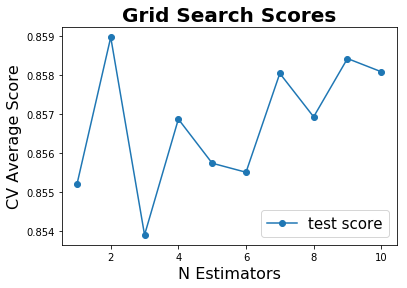

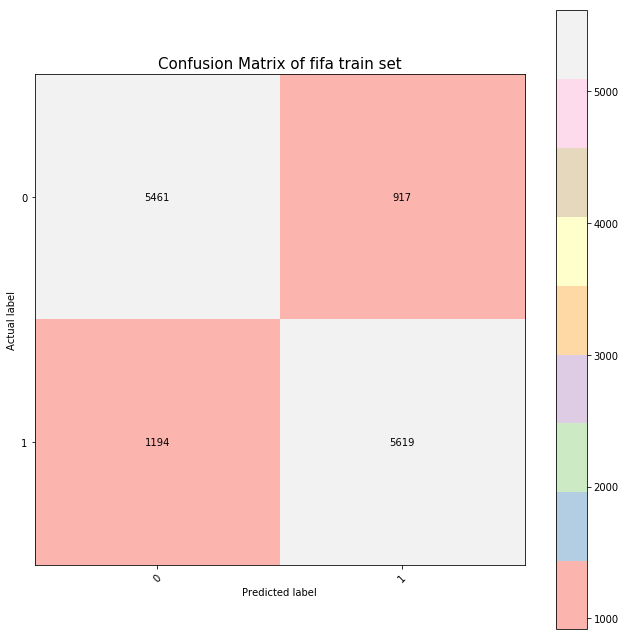

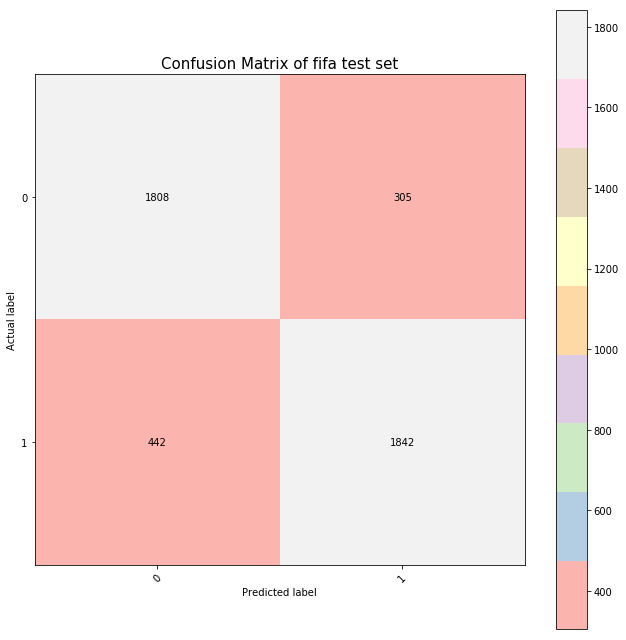

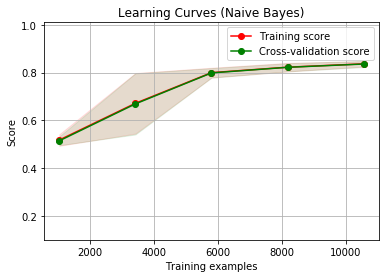

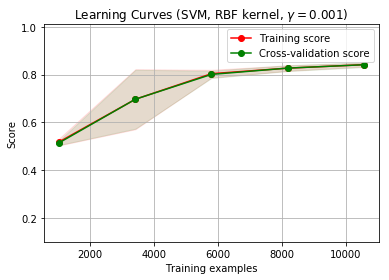

# Tuning hyper-parameters for precision

Iteration 1, loss = 0.82416528
Validation score: 0.429864
Iteration 2, loss = 0.79034066
Validation score: 0.429864
Iteration 3, loss = 0.75402916
Validation score: 0.429864
Iteration 4, loss = 0.72795607
Validation score: 0.429864
Iteration 5, loss = 0.71103693
Validation score: 0.429864
Iteration 6, loss = 0.70016080
Validation score: 0.429864
Iteration 7, loss = 0.69370512
Validation score: 0.429864
Iteration 8, loss = 0.68761642
Validation score: 0.429864
Iteration 9, loss = 0.68139786
Validation score: 0.429864
Iteration 10, loss = 0.67527635
Validation score: 0.429864
Iteration 11, loss = 0.67013860
Validation score: 0.579186
Iteration 12, loss = 0.66452327
Validation score: 0.565611
Iteration 13, loss = 0.65941530
Validation score: 0.570136
Iteration 14, loss = 0.65455400
Validation score: 0.583710
Iteration 15, loss = 0.65027594
Validation score: 0.592760
Iteration 16, loss = 0.64600214
Validation score: 0.592760
Iteration 17, loss = 0.6

Iteration 36, loss = 0.58206969
Validation score: 0.701357
Iteration 37, loss = 0.57900122
Validation score: 0.696833
Iteration 38, loss = 0.57625394
Validation score: 0.696833
Iteration 39, loss = 0.57362116
Validation score: 0.705882
Iteration 40, loss = 0.57064161
Validation score: 0.710407
Iteration 41, loss = 0.56807222
Validation score: 0.710407
Iteration 42, loss = 0.56559224
Validation score: 0.710407
Iteration 43, loss = 0.56289586
Validation score: 0.710407
Iteration 44, loss = 0.56029324
Validation score: 0.705882
Iteration 45, loss = 0.55797544
Validation score: 0.710407
Iteration 46, loss = 0.55559645
Validation score: 0.710407
Iteration 47, loss = 0.55295711
Validation score: 0.710407
Iteration 48, loss = 0.55043836
Validation score: 0.719457
Iteration 49, loss = 0.54801168
Validation score: 0.719457
Iteration 50, loss = 0.54571023
Validation score: 0.723982
Iteration 51, loss = 0.54317554
Validation score: 0.723982
Iteration 52, loss = 0.54113417
Validation score: 0.7239

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Validation score: 0.615385
Iteration 8, loss = 0.64541062
Validation score: 0.642534
Iteration 9, loss = 0.64083981
Validation score: 0.656109
Iteration 10, loss = 0.63688190
Validation score: 0.660633
Iteration 11, loss = 0.63299379
Validation score: 0.674208
Iteration 12, loss = 0.62951421
Validation score: 0.683258
Iteration 13, loss = 0.62567401
Validation score: 0.696833
Iteration 14, loss = 0.62226144
Validation score: 0.701357
Iteration 15, loss = 0.61899837
Validation score: 0.701357
Iteration 16, loss = 0.61591492
Validation score: 0.705882
Iteration 17, loss = 0.61258140
Validation score: 0.705882
Iteration 18, loss = 0.60971198
Validation score: 0.696833
Iteration 19, loss = 0.60658291
Validation score: 0.710407
Iteration 20, loss = 0.60414821
Validation score: 0.719457
Iteration 21, loss = 0.60132995
Validation score: 0.723982
Iteration 22, loss = 0.59890597
Validation score: 0.714932
Iteration 23, loss = 0.59608069
Validation score: 0.719457
Iteration 24, loss = 0.5931917

Iteration 50, loss = 0.53687871
Validation score: 0.760181
Iteration 51, loss = 0.53423684
Validation score: 0.764706
Iteration 52, loss = 0.53169598
Validation score: 0.769231
Iteration 53, loss = 0.52940066
Validation score: 0.769231
Iteration 54, loss = 0.52744363
Validation score: 0.773756
Iteration 55, loss = 0.52456116
Validation score: 0.773756
Iteration 56, loss = 0.52205143
Validation score: 0.773756
Iteration 57, loss = 0.51995723
Validation score: 0.769231
Iteration 58, loss = 0.51766212
Validation score: 0.769231
Iteration 59, loss = 0.51523747
Validation score: 0.769231
Iteration 60, loss = 0.51402007
Validation score: 0.773756
Iteration 61, loss = 0.51091350
Validation score: 0.773756
Iteration 62, loss = 0.50892623
Validation score: 0.778281
Iteration 63, loss = 0.50685376
Validation score: 0.787330
Iteration 64, loss = 0.50445641
Validation score: 0.787330
Iteration 65, loss = 0.50215762
Validation score: 0.782805
Iteration 66, loss = 0.50080910
Validation score: 0.7737

Iteration 1, loss = 0.68696083
Validation score: 0.542986
Iteration 2, loss = 0.67942756
Validation score: 0.597285
Iteration 3, loss = 0.67312725
Validation score: 0.606335
Iteration 4, loss = 0.66669654
Validation score: 0.610860
Iteration 5, loss = 0.66064760
Validation score: 0.651584
Iteration 6, loss = 0.65526077
Validation score: 0.651584
Iteration 7, loss = 0.65059026
Validation score: 0.660633
Iteration 8, loss = 0.64570789
Validation score: 0.701357
Iteration 9, loss = 0.64143177
Validation score: 0.687783
Iteration 10, loss = 0.63730899
Validation score: 0.723982
Iteration 11, loss = 0.63335987
Validation score: 0.719457
Iteration 12, loss = 0.62974856
Validation score: 0.719457
Iteration 13, loss = 0.62621031
Validation score: 0.742081
Iteration 14, loss = 0.62258161
Validation score: 0.746606
Iteration 15, loss = 0.61932883
Validation score: 0.755656
Iteration 16, loss = 0.61608657
Validation score: 0.764706
Iteration 17, loss = 0.61311659
Validation score: 0.773756
Iterat

Iteration 61, loss = 0.50803047
Validation score: 0.764706
Iteration 62, loss = 0.50660015
Validation score: 0.773756
Iteration 63, loss = 0.50491242
Validation score: 0.773756
Iteration 64, loss = 0.50338340
Validation score: 0.773756
Iteration 65, loss = 0.50193267
Validation score: 0.773756
Iteration 66, loss = 0.50014409
Validation score: 0.773756
Iteration 67, loss = 0.49882997
Validation score: 0.773756
Iteration 68, loss = 0.49780247
Validation score: 0.778281
Iteration 69, loss = 0.49627434
Validation score: 0.782805
Iteration 70, loss = 0.49536873
Validation score: 0.773756
Iteration 71, loss = 0.49324506
Validation score: 0.782805
Iteration 72, loss = 0.49156124
Validation score: 0.778281
Iteration 73, loss = 0.49045868
Validation score: 0.778281
Iteration 74, loss = 0.48892072
Validation score: 0.782805
Iteration 75, loss = 0.48772559
Validation score: 0.778281
Iteration 76, loss = 0.48612236
Validation score: 0.769231
Iteration 77, loss = 0.48513060
Validation score: 0.7692

Iteration 39, loss = 0.56392031
Validation score: 0.751131
Iteration 40, loss = 0.56145961
Validation score: 0.751131
Iteration 41, loss = 0.55869609
Validation score: 0.755656
Iteration 42, loss = 0.55684317
Validation score: 0.755656
Iteration 43, loss = 0.55413604
Validation score: 0.760181
Iteration 44, loss = 0.55193808
Validation score: 0.760181
Iteration 45, loss = 0.54984292
Validation score: 0.760181
Iteration 46, loss = 0.54708137
Validation score: 0.764706
Iteration 47, loss = 0.54472431
Validation score: 0.764706
Iteration 48, loss = 0.54210728
Validation score: 0.764706
Iteration 49, loss = 0.53980430
Validation score: 0.760181
Iteration 50, loss = 0.53772520
Validation score: 0.773756
Iteration 51, loss = 0.53596402
Validation score: 0.764706
Iteration 52, loss = 0.53342483
Validation score: 0.769231
Iteration 53, loss = 0.53151656
Validation score: 0.769231
Iteration 54, loss = 0.52969939
Validation score: 0.769231
Iteration 55, loss = 0.52767261
Validation score: 0.7692

Iteration 40, loss = 0.54729758
Validation score: 0.733032
Iteration 41, loss = 0.54492116
Validation score: 0.728507
Iteration 42, loss = 0.54244590
Validation score: 0.733032
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.91531848
Validation score: 0.565611
Iteration 2, loss = 0.70931567
Validation score: 0.425339
Iteration 3, loss = 0.69011393
Validation score: 0.447964
Iteration 4, loss = 0.68539254
Validation score: 0.443439
Iteration 5, loss = 0.67808993
Validation score: 0.497738
Iteration 6, loss = 0.67248128
Validation score: 0.511312
Iteration 7, loss = 0.66717298
Validation score: 0.538462
Iteration 8, loss = 0.66163828
Validation score: 0.515837
Iteration 9, loss = 0.65584674
Validation score: 0.538462
Iteration 10, loss = 0.65007790
Validation score: 0.565611
Iteration 11, loss = 0.64400324
Validation score: 0.579186
Iteration 12, loss = 0.63889929
Validation score: 0.574661
Iteration 13, loss = 0.63268291

Iteration 41, loss = 0.55780019
Validation score: 0.705882
Iteration 42, loss = 0.55648099
Validation score: 0.701357
Iteration 43, loss = 0.55502298
Validation score: 0.710407
Iteration 44, loss = 0.55242796
Validation score: 0.701357
Iteration 45, loss = 0.55037415
Validation score: 0.705882
Iteration 46, loss = 0.54850872
Validation score: 0.705882
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.90653195
Validation score: 0.506787
Iteration 2, loss = 0.70462812
Validation score: 0.520362
Iteration 3, loss = 0.69060459
Validation score: 0.515837
Iteration 4, loss = 0.68770614
Validation score: 0.542986
Iteration 5, loss = 0.67945088
Validation score: 0.592760
Iteration 6, loss = 0.67518157
Validation score: 0.574661
Iteration 7, loss = 0.67042891
Validation score: 0.601810
Iteration 8, loss = 0.66537900
Validation score: 0.638009
Iteration 9, loss = 0.66050346
Validation score: 0.656109
Iteration 10, loss = 0.65514914

Iteration 49, loss = 0.53329452
Validation score: 0.760181
Iteration 50, loss = 0.53128632
Validation score: 0.760181
Iteration 51, loss = 0.52995550
Validation score: 0.746606
Iteration 52, loss = 0.52679575
Validation score: 0.751131
Iteration 53, loss = 0.52397970
Validation score: 0.751131
Iteration 54, loss = 0.52222161
Validation score: 0.751131
Iteration 55, loss = 0.51963056
Validation score: 0.755656
Iteration 56, loss = 0.51734833
Validation score: 0.755656
Iteration 57, loss = 0.51527955
Validation score: 0.755656
Iteration 58, loss = 0.51297794
Validation score: 0.755656
Iteration 59, loss = 0.51201138
Validation score: 0.760181
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78029452
Validation score: 0.547511
Iteration 2, loss = 0.71388293
Validation score: 0.493213
Iteration 3, loss = 0.69517788
Validation score: 0.497738
Iteration 4, loss = 0.68975736
Validation score: 0.524887
Iteration 5, loss = 0.6869

Iteration 8, loss = 0.68178145
Validation score: 0.619910
Iteration 9, loss = 0.67940310
Validation score: 0.638009
Iteration 10, loss = 0.67689236
Validation score: 0.628959
Iteration 11, loss = 0.67425564
Validation score: 0.647059
Iteration 12, loss = 0.67133402
Validation score: 0.660633
Iteration 13, loss = 0.66816272
Validation score: 0.651584
Iteration 14, loss = 0.66479207
Validation score: 0.669683
Iteration 15, loss = 0.66116419
Validation score: 0.678733
Iteration 16, loss = 0.65751310
Validation score: 0.683258
Iteration 17, loss = 0.65301707
Validation score: 0.678733
Iteration 18, loss = 0.64863037
Validation score: 0.701357
Iteration 19, loss = 0.64400466
Validation score: 0.705882
Iteration 20, loss = 0.63944487
Validation score: 0.710407
Iteration 21, loss = 0.63460710
Validation score: 0.710407
Iteration 22, loss = 0.62955093
Validation score: 0.723982
Iteration 23, loss = 0.62468332
Validation score: 0.714932
Iteration 24, loss = 0.61984386
Validation score: 0.714932

Iteration 116, loss = 0.45556151
Validation score: 0.828054
Iteration 117, loss = 0.45489666
Validation score: 0.828054
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.77988000
Validation score: 0.520362
Iteration 2, loss = 0.71709473
Validation score: 0.488688
Iteration 3, loss = 0.69616071
Validation score: 0.542986
Iteration 4, loss = 0.69132904
Validation score: 0.561086
Iteration 5, loss = 0.68799069
Validation score: 0.579186
Iteration 6, loss = 0.68517924
Validation score: 0.570136
Iteration 7, loss = 0.68240898
Validation score: 0.606335
Iteration 8, loss = 0.67986747
Validation score: 0.628959
Iteration 9, loss = 0.67731497
Validation score: 0.642534
Iteration 10, loss = 0.67457771
Validation score: 0.656109
Iteration 11, loss = 0.67150500
Validation score: 0.642534
Iteration 12, loss = 0.66829976
Validation score: 0.656109
Iteration 13, loss = 0.66495375
Validation score: 0.656109
Iteration 14, loss = 0.661099

Iteration 23, loss = 0.56559704
Validation score: 0.742081
Iteration 24, loss = 0.56194135
Validation score: 0.742081
Iteration 25, loss = 0.55841970
Validation score: 0.737557
Iteration 26, loss = 0.55523312
Validation score: 0.737557
Iteration 27, loss = 0.55222973
Validation score: 0.755656
Iteration 28, loss = 0.54905953
Validation score: 0.755656
Iteration 29, loss = 0.54671435
Validation score: 0.760181
Iteration 30, loss = 0.54346501
Validation score: 0.755656
Iteration 31, loss = 0.54100278
Validation score: 0.760181
Iteration 32, loss = 0.54074365
Validation score: 0.755656
Iteration 33, loss = 0.53747534
Validation score: 0.760181
Iteration 34, loss = 0.53351256
Validation score: 0.764706
Iteration 35, loss = 0.53176477
Validation score: 0.764706
Iteration 36, loss = 0.52878519
Validation score: 0.778281
Iteration 37, loss = 0.52594868
Validation score: 0.764706
Iteration 38, loss = 0.52476134
Validation score: 0.787330
Iteration 39, loss = 0.52137123
Validation score: 0.7873

Iteration 35, loss = 0.53535681
Validation score: 0.742081
Iteration 36, loss = 0.53311881
Validation score: 0.742081
Iteration 37, loss = 0.53073816
Validation score: 0.737557
Iteration 38, loss = 0.52749435
Validation score: 0.755656
Iteration 39, loss = 0.52589113
Validation score: 0.751131
Iteration 40, loss = 0.52356754
Validation score: 0.760181
Iteration 41, loss = 0.52145384
Validation score: 0.755656
Iteration 42, loss = 0.51911697
Validation score: 0.760181
Iteration 43, loss = 0.51701620
Validation score: 0.764706
Iteration 44, loss = 0.51436873
Validation score: 0.760181
Iteration 45, loss = 0.51255811
Validation score: 0.769231
Iteration 46, loss = 0.51081159
Validation score: 0.773756
Iteration 47, loss = 0.50842939
Validation score: 0.773756
Iteration 48, loss = 0.50669491
Validation score: 0.778281
Iteration 49, loss = 0.50456285
Validation score: 0.769231
Iteration 50, loss = 0.50345457
Validation score: 0.773756
Iteration 51, loss = 0.50163234
Validation score: 0.7828

Iteration 6, loss = 0.64892868
Validation score: 0.633484
Iteration 7, loss = 0.64450827
Validation score: 0.642534
Iteration 8, loss = 0.63994246
Validation score: 0.665158
Iteration 9, loss = 0.63574955
Validation score: 0.674208
Iteration 10, loss = 0.63140023
Validation score: 0.678733
Iteration 11, loss = 0.62763964
Validation score: 0.678733
Iteration 12, loss = 0.62346014
Validation score: 0.683258
Iteration 13, loss = 0.61961066
Validation score: 0.687783
Iteration 14, loss = 0.61598190
Validation score: 0.687783
Iteration 15, loss = 0.61219063
Validation score: 0.683258
Iteration 16, loss = 0.60862902
Validation score: 0.683258
Iteration 17, loss = 0.60510535
Validation score: 0.687783
Iteration 18, loss = 0.60172611
Validation score: 0.692308
Iteration 19, loss = 0.59867264
Validation score: 0.701357
Iteration 20, loss = 0.59560633
Validation score: 0.701357
Iteration 21, loss = 0.59203756
Validation score: 0.710407
Iteration 22, loss = 0.58927543
Validation score: 0.710407
I

Validation score: 0.710407
Iteration 12, loss = 0.62991739
Validation score: 0.705882
Iteration 13, loss = 0.62664043
Validation score: 0.714932
Iteration 14, loss = 0.62352053
Validation score: 0.719457
Iteration 15, loss = 0.62072119
Validation score: 0.710407
Iteration 16, loss = 0.61744348
Validation score: 0.710407
Iteration 17, loss = 0.61469329
Validation score: 0.705882
Iteration 18, loss = 0.61184968
Validation score: 0.705882
Iteration 19, loss = 0.60924286
Validation score: 0.714932
Iteration 20, loss = 0.60620034
Validation score: 0.714932
Iteration 21, loss = 0.60373767
Validation score: 0.714932
Iteration 22, loss = 0.60128696
Validation score: 0.719457
Iteration 23, loss = 0.59833958
Validation score: 0.728507
Iteration 24, loss = 0.59638385
Validation score: 0.733032
Iteration 25, loss = 0.59377910
Validation score: 0.719457
Iteration 26, loss = 0.59110244
Validation score: 0.728507
Iteration 27, loss = 0.58851580
Validation score: 0.723982
Iteration 28, loss = 0.586139

Iteration 1, loss = 0.86749993
Validation score: 0.556561
Iteration 2, loss = 0.68921462
Validation score: 0.484163
Iteration 3, loss = 0.67215458
Validation score: 0.647059
Iteration 4, loss = 0.65323928
Validation score: 0.687783
Iteration 5, loss = 0.64610297
Validation score: 0.701357
Iteration 6, loss = 0.63832338
Validation score: 0.710407
Iteration 7, loss = 0.63206412
Validation score: 0.733032
Iteration 8, loss = 0.62587600
Validation score: 0.728507
Iteration 9, loss = 0.61925211
Validation score: 0.751131
Iteration 10, loss = 0.61322679
Validation score: 0.746606
Iteration 11, loss = 0.60691982
Validation score: 0.755656
Iteration 12, loss = 0.60059692
Validation score: 0.746606
Iteration 13, loss = 0.59528202
Validation score: 0.742081
Iteration 14, loss = 0.58898828
Validation score: 0.755656
Iteration 15, loss = 0.58388333
Validation score: 0.746606
Iteration 16, loss = 0.57908377
Validation score: 0.755656
Iteration 17, loss = 0.57381880
Validation score: 0.755656
Iterat

Iteration 26, loss = 0.53504547
Validation score: 0.746606
Iteration 27, loss = 0.53157153
Validation score: 0.746606
Iteration 28, loss = 0.52827777
Validation score: 0.746606
Iteration 29, loss = 0.52526459
Validation score: 0.755656
Iteration 30, loss = 0.52213843
Validation score: 0.755656
Iteration 31, loss = 0.51931108
Validation score: 0.760181
Iteration 32, loss = 0.51618891
Validation score: 0.755656
Iteration 33, loss = 0.51308838
Validation score: 0.760181
Iteration 34, loss = 0.51117814
Validation score: 0.760181
Iteration 35, loss = 0.50819906
Validation score: 0.755656
Iteration 36, loss = 0.50538109
Validation score: 0.755656
Iteration 37, loss = 0.50286232
Validation score: 0.764706
Iteration 38, loss = 0.50034895
Validation score: 0.755656
Iteration 39, loss = 0.49795669
Validation score: 0.764706
Iteration 40, loss = 0.49574086
Validation score: 0.760181
Iteration 41, loss = 0.49330321
Validation score: 0.755656
Iteration 42, loss = 0.49080708
Validation score: 0.7692

Iteration 7, loss = 0.65374708
Validation score: 0.624434
Iteration 8, loss = 0.64992780
Validation score: 0.619910
Iteration 9, loss = 0.64562428
Validation score: 0.628959
Iteration 10, loss = 0.64176111
Validation score: 0.628959
Iteration 11, loss = 0.63771812
Validation score: 0.647059
Iteration 12, loss = 0.63335441
Validation score: 0.656109
Iteration 13, loss = 0.62909681
Validation score: 0.651584
Iteration 14, loss = 0.62511087
Validation score: 0.656109
Iteration 15, loss = 0.62095258
Validation score: 0.665158
Iteration 16, loss = 0.61684580
Validation score: 0.669683
Iteration 17, loss = 0.61279824
Validation score: 0.660633
Iteration 18, loss = 0.60884249
Validation score: 0.660633
Iteration 19, loss = 0.60513627
Validation score: 0.660633
Iteration 20, loss = 0.60117032
Validation score: 0.660633
Iteration 21, loss = 0.59757627
Validation score: 0.656109
Iteration 22, loss = 0.59423272
Validation score: 0.656109
Iteration 23, loss = 0.59041821
Validation score: 0.651584


Iteration 32, loss = 0.53884290
Validation score: 0.710407
Iteration 33, loss = 0.53498783
Validation score: 0.714932
Iteration 34, loss = 0.53181211
Validation score: 0.719457
Iteration 35, loss = 0.52892949
Validation score: 0.714932
Iteration 36, loss = 0.52566908
Validation score: 0.733032
Iteration 37, loss = 0.52297295
Validation score: 0.723982
Iteration 38, loss = 0.51961995
Validation score: 0.719457
Iteration 39, loss = 0.51698779
Validation score: 0.723982
Iteration 40, loss = 0.51414586
Validation score: 0.723982
Iteration 41, loss = 0.51164839
Validation score: 0.733032
Iteration 42, loss = 0.50879528
Validation score: 0.746606
Iteration 43, loss = 0.50614756
Validation score: 0.737557
Iteration 44, loss = 0.50344187
Validation score: 0.742081
Iteration 45, loss = 0.50123963
Validation score: 0.728507
Iteration 46, loss = 0.49879602
Validation score: 0.733032
Iteration 47, loss = 0.49598956
Validation score: 0.737557
Iteration 48, loss = 0.49424441
Validation score: 0.7420

Iteration 1, loss = 0.70774343
Validation score: 0.565217
Iteration 2, loss = 0.68633301
Validation score: 0.518116
Iteration 3, loss = 0.68014058
Validation score: 0.576087
Iteration 4, loss = 0.67307980
Validation score: 0.590580
Iteration 5, loss = 0.66686880
Validation score: 0.608696
Iteration 6, loss = 0.66046242
Validation score: 0.626812
Iteration 7, loss = 0.65346471
Validation score: 0.641304
Iteration 8, loss = 0.64655050
Validation score: 0.641304
Iteration 9, loss = 0.63946456
Validation score: 0.659420
Iteration 10, loss = 0.63230306
Validation score: 0.655797
Iteration 11, loss = 0.62493512
Validation score: 0.659420
Iteration 12, loss = 0.61771672
Validation score: 0.684783
Iteration 13, loss = 0.61075019
Validation score: 0.673913
Iteration 14, loss = 0.60373311
Validation score: 0.681159
Iteration 15, loss = 0.59702058
Validation score: 0.688406
Iteration 16, loss = 0.59033661
Validation score: 0.681159
Iteration 17, loss = 0.58437834
Validation score: 0.688406
Iterat

Iteration 1, loss = 0.83206585
Validation score: 0.493213
Iteration 2, loss = 0.79649201
Validation score: 0.493213
Iteration 3, loss = 0.75806254
Validation score: 0.493213
Iteration 4, loss = 0.73116380
Validation score: 0.493213
Iteration 5, loss = 0.71337966
Validation score: 0.493213
Iteration 6, loss = 0.70248995
Validation score: 0.493213
Iteration 7, loss = 0.69625731
Validation score: 0.493213
Iteration 8, loss = 0.69222157
Validation score: 0.493213
Iteration 9, loss = 0.68917684
Validation score: 0.493213
Iteration 10, loss = 0.68552521
Validation score: 0.493213
Iteration 11, loss = 0.68214679
Validation score: 0.493213
Iteration 12, loss = 0.67760409
Validation score: 0.597285
Iteration 13, loss = 0.67387926
Validation score: 0.601810
Iteration 14, loss = 0.66879736
Validation score: 0.597285
Iteration 15, loss = 0.66477313
Validation score: 0.583710
Iteration 16, loss = 0.66002943
Validation score: 0.606335
Iteration 17, loss = 0.65564284
Validation score: 0.601810
Iterat

Iteration 102, loss = 0.45326732
Validation score: 0.778281
Iteration 103, loss = 0.45234760
Validation score: 0.782805
Iteration 104, loss = 0.45196391
Validation score: 0.782805
Iteration 105, loss = 0.44992261
Validation score: 0.782805
Iteration 106, loss = 0.44884366
Validation score: 0.778281
Iteration 107, loss = 0.44800756
Validation score: 0.773756
Iteration 108, loss = 0.44700116
Validation score: 0.787330
Iteration 109, loss = 0.44640180
Validation score: 0.778281
Iteration 110, loss = 0.44488657
Validation score: 0.773756
Iteration 111, loss = 0.44439624
Validation score: 0.787330
Iteration 112, loss = 0.44411558
Validation score: 0.778281
Iteration 113, loss = 0.44158787
Validation score: 0.778281
Iteration 114, loss = 0.44069051
Validation score: 0.782805
Iteration 115, loss = 0.43972297
Validation score: 0.773756
Iteration 116, loss = 0.43922221
Validation score: 0.787330
Iteration 117, loss = 0.43823580
Validation score: 0.773756
Iteration 118, loss = 0.43730022
Validat

Validation score: 0.760181
Iteration 41, loss = 0.55670591
Validation score: 0.764706
Iteration 42, loss = 0.55455045
Validation score: 0.760181
Iteration 43, loss = 0.55251090
Validation score: 0.760181
Iteration 44, loss = 0.55004943
Validation score: 0.760181
Iteration 45, loss = 0.54746072
Validation score: 0.760181
Iteration 46, loss = 0.54569976
Validation score: 0.760181
Iteration 47, loss = 0.54285586
Validation score: 0.760181
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68770461
Validation score: 0.561086
Iteration 2, loss = 0.67877944
Validation score: 0.574661
Iteration 3, loss = 0.67282324
Validation score: 0.597285
Iteration 4, loss = 0.66690590
Validation score: 0.606335
Iteration 5, loss = 0.65967071
Validation score: 0.628959
Iteration 6, loss = 0.65395126
Validation score: 0.624434
Iteration 7, loss = 0.64859793
Validation score: 0.624434
Iteration 8, loss = 0.64354914
Validation score: 0.647059
Ite

Iteration 45, loss = 0.55909196
Validation score: 0.760181
Iteration 46, loss = 0.55711379
Validation score: 0.764706
Iteration 47, loss = 0.55468599
Validation score: 0.764706
Iteration 48, loss = 0.55244769
Validation score: 0.769231
Iteration 49, loss = 0.55038377
Validation score: 0.773756
Iteration 50, loss = 0.54805988
Validation score: 0.778281
Iteration 51, loss = 0.54606278
Validation score: 0.778281
Iteration 52, loss = 0.54378755
Validation score: 0.782805
Iteration 53, loss = 0.54188148
Validation score: 0.782805
Iteration 54, loss = 0.53974023
Validation score: 0.782805
Iteration 55, loss = 0.53725313
Validation score: 0.778281
Iteration 56, loss = 0.53557407
Validation score: 0.787330
Iteration 57, loss = 0.53315131
Validation score: 0.787330
Iteration 58, loss = 0.53079037
Validation score: 0.791855
Iteration 59, loss = 0.52908458
Validation score: 0.778281
Iteration 60, loss = 0.52680306
Validation score: 0.787330
Iteration 61, loss = 0.52495128
Validation score: 0.7873

Validation score: 0.570136
Iteration 2, loss = 0.68531245
Validation score: 0.556561
Iteration 3, loss = 0.68217402
Validation score: 0.533937
Iteration 4, loss = 0.67948394
Validation score: 0.556561
Iteration 5, loss = 0.67650210
Validation score: 0.579186
Iteration 6, loss = 0.67315555
Validation score: 0.583710
Iteration 7, loss = 0.66991586
Validation score: 0.597285
Iteration 8, loss = 0.66640709
Validation score: 0.610860
Iteration 9, loss = 0.66289059
Validation score: 0.624434
Iteration 10, loss = 0.65903928
Validation score: 0.628959
Iteration 11, loss = 0.65508565
Validation score: 0.633484
Iteration 12, loss = 0.65099126
Validation score: 0.642534
Iteration 13, loss = 0.64662915
Validation score: 0.651584
Iteration 14, loss = 0.64216762
Validation score: 0.660633
Iteration 15, loss = 0.63749625
Validation score: 0.669683
Iteration 16, loss = 0.63298098
Validation score: 0.678733
Iteration 17, loss = 0.62853230
Validation score: 0.678733
Iteration 18, loss = 0.62372815
Valid

Iteration 17, loss = 0.62998161
Validation score: 0.737557
Iteration 18, loss = 0.62594775
Validation score: 0.737557
Iteration 19, loss = 0.62161219
Validation score: 0.742081
Iteration 20, loss = 0.61721351
Validation score: 0.760181
Iteration 21, loss = 0.61323716
Validation score: 0.755656
Iteration 22, loss = 0.60887364
Validation score: 0.746606
Iteration 23, loss = 0.60513424
Validation score: 0.751131
Iteration 24, loss = 0.60110472
Validation score: 0.764706
Iteration 25, loss = 0.59709186
Validation score: 0.751131
Iteration 26, loss = 0.59357294
Validation score: 0.764706
Iteration 27, loss = 0.58971707
Validation score: 0.760181
Iteration 28, loss = 0.58648905
Validation score: 0.755656
Iteration 29, loss = 0.58289594
Validation score: 0.760181
Iteration 30, loss = 0.57991626
Validation score: 0.755656
Iteration 31, loss = 0.57657988
Validation score: 0.755656
Iteration 32, loss = 0.57366552
Validation score: 0.760181
Iteration 33, loss = 0.57041331
Validation score: 0.7647

Iteration 72, loss = 0.50221276
Validation score: 0.751131
Iteration 73, loss = 0.50108521
Validation score: 0.760181
Iteration 74, loss = 0.50084003
Validation score: 0.764706
Iteration 75, loss = 0.49855057
Validation score: 0.764706
Iteration 76, loss = 0.49736678
Validation score: 0.760181
Iteration 77, loss = 0.49573223
Validation score: 0.760181
Iteration 78, loss = 0.49471209
Validation score: 0.760181
Iteration 79, loss = 0.49300703
Validation score: 0.760181
Iteration 80, loss = 0.49180125
Validation score: 0.760181
Iteration 81, loss = 0.49092932
Validation score: 0.760181
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68806781
Validation score: 0.479638
Iteration 2, loss = 0.68428533
Validation score: 0.515837
Iteration 3, loss = 0.68124691
Validation score: 0.538462
Iteration 4, loss = 0.67835877
Validation score: 0.542986
Iteration 5, loss = 0.67548107
Validation score: 0.570136
Iteration 6, loss = 0.67221

Iteration 27, loss = 0.58632304
Validation score: 0.674208
Iteration 28, loss = 0.58363846
Validation score: 0.669683
Iteration 29, loss = 0.58105375
Validation score: 0.678733
Iteration 30, loss = 0.57891493
Validation score: 0.674208
Iteration 31, loss = 0.57598336
Validation score: 0.678733
Iteration 32, loss = 0.57407356
Validation score: 0.669683
Iteration 33, loss = 0.57201480
Validation score: 0.669683
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.91726015
Validation score: 0.570136
Iteration 2, loss = 0.71489670
Validation score: 0.515837
Iteration 3, loss = 0.69206555
Validation score: 0.470588
Iteration 4, loss = 0.68801568
Validation score: 0.533937
Iteration 5, loss = 0.68081837
Validation score: 0.588235
Iteration 6, loss = 0.67613986
Validation score: 0.610860
Iteration 7, loss = 0.67126708
Validation score: 0.610860
Iteration 8, loss = 0.66630550
Validation score: 0.601810
Iteration 9, loss = 0.66093569

Validation score: 0.660633
Iteration 14, loss = 0.66082736
Validation score: 0.660633
Iteration 15, loss = 0.65677113
Validation score: 0.660633
Iteration 16, loss = 0.65267838
Validation score: 0.687783
Iteration 17, loss = 0.64801354
Validation score: 0.674208
Iteration 18, loss = 0.64321063
Validation score: 0.674208
Iteration 19, loss = 0.63830392
Validation score: 0.692308
Iteration 20, loss = 0.63338806
Validation score: 0.701357
Iteration 21, loss = 0.62799683
Validation score: 0.705882
Iteration 22, loss = 0.62289771
Validation score: 0.701357
Iteration 23, loss = 0.61767640
Validation score: 0.705882
Iteration 24, loss = 0.61252963
Validation score: 0.701357
Iteration 25, loss = 0.60764543
Validation score: 0.701357
Iteration 26, loss = 0.60335384
Validation score: 0.714932
Iteration 27, loss = 0.59876371
Validation score: 0.701357
Iteration 28, loss = 0.59402141
Validation score: 0.714932
Iteration 29, loss = 0.59001037
Validation score: 0.714932
Iteration 30, loss = 0.586149

Iteration 93, loss = 0.46845168
Validation score: 0.805430
Iteration 94, loss = 0.46757767
Validation score: 0.814480
Iteration 95, loss = 0.46634403
Validation score: 0.805430
Iteration 96, loss = 0.46563395
Validation score: 0.814480
Iteration 97, loss = 0.46443845
Validation score: 0.814480
Iteration 98, loss = 0.46368478
Validation score: 0.814480
Iteration 99, loss = 0.46276560
Validation score: 0.814480
Iteration 100, loss = 0.46133650
Validation score: 0.823529
Iteration 101, loss = 0.46063563
Validation score: 0.819005
Iteration 102, loss = 0.46098050
Validation score: 0.828054
Iteration 103, loss = 0.45888297
Validation score: 0.828054
Iteration 104, loss = 0.45844965
Validation score: 0.828054
Iteration 105, loss = 0.45783193
Validation score: 0.828054
Iteration 106, loss = 0.45614190
Validation score: 0.828054
Iteration 107, loss = 0.45561069
Validation score: 0.828054
Iteration 108, loss = 0.45467197
Validation score: 0.832579
Iteration 109, loss = 0.45380023
Validation sco

Iteration 79, loss = 0.49463149
Validation score: 0.787330
Iteration 80, loss = 0.49291679
Validation score: 0.782805
Iteration 81, loss = 0.49188007
Validation score: 0.787330
Iteration 82, loss = 0.49123905
Validation score: 0.782805
Iteration 83, loss = 0.48883611
Validation score: 0.787330
Iteration 84, loss = 0.48744246
Validation score: 0.787330
Iteration 85, loss = 0.48626104
Validation score: 0.787330
Iteration 86, loss = 0.48470449
Validation score: 0.791855
Iteration 87, loss = 0.48348877
Validation score: 0.796380
Iteration 88, loss = 0.48265475
Validation score: 0.796380
Iteration 89, loss = 0.48087718
Validation score: 0.805430
Iteration 90, loss = 0.47969550
Validation score: 0.800905
Iteration 91, loss = 0.47857144
Validation score: 0.809955
Iteration 92, loss = 0.47873212
Validation score: 0.796380
Iteration 93, loss = 0.47779692
Validation score: 0.800905
Iteration 94, loss = 0.47595963
Validation score: 0.809955
Iteration 95, loss = 0.47413235
Validation score: 0.8099

Iteration 53, loss = 0.49287064
Validation score: 0.814480
Iteration 54, loss = 0.49117306
Validation score: 0.819005
Iteration 55, loss = 0.48997973
Validation score: 0.809955
Iteration 56, loss = 0.48759507
Validation score: 0.809955
Iteration 57, loss = 0.48649054
Validation score: 0.814480
Iteration 58, loss = 0.48499551
Validation score: 0.809955
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70068352
Validation score: 0.466063
Iteration 2, loss = 0.69060907
Validation score: 0.479638
Iteration 3, loss = 0.68131149
Validation score: 0.565611
Iteration 4, loss = 0.67235230
Validation score: 0.583710
Iteration 5, loss = 0.66439212
Validation score: 0.628959
Iteration 6, loss = 0.65647897
Validation score: 0.633484
Iteration 7, loss = 0.64946384
Validation score: 0.656109
Iteration 8, loss = 0.64290388
Validation score: 0.660633
Iteration 9, loss = 0.63699310
Validation score: 0.665158
Iteration 10, loss = 0.63021525

Iteration 65, loss = 0.47969657
Validation score: 0.787330
Iteration 66, loss = 0.47720737
Validation score: 0.796380
Iteration 67, loss = 0.47620678
Validation score: 0.782805
Iteration 68, loss = 0.47494741
Validation score: 0.805430
Iteration 69, loss = 0.47405579
Validation score: 0.800905
Iteration 70, loss = 0.47225661
Validation score: 0.809955
Iteration 71, loss = 0.47103226
Validation score: 0.814480
Iteration 72, loss = 0.47045674
Validation score: 0.805430
Iteration 73, loss = 0.46915941
Validation score: 0.809955
Iteration 74, loss = 0.46773180
Validation score: 0.809955
Iteration 75, loss = 0.46584158
Validation score: 0.809955
Iteration 76, loss = 0.46554137
Validation score: 0.809955
Iteration 77, loss = 0.46436666
Validation score: 0.809955
Iteration 78, loss = 0.46257933
Validation score: 0.814480
Iteration 79, loss = 0.46232612
Validation score: 0.819005
Iteration 80, loss = 0.46028779
Validation score: 0.814480
Iteration 81, loss = 0.45947642
Validation score: 0.8190

Iteration 25, loss = 0.58813722
Validation score: 0.751131
Iteration 26, loss = 0.58540563
Validation score: 0.737557
Iteration 27, loss = 0.58284093
Validation score: 0.746606
Iteration 28, loss = 0.58044815
Validation score: 0.755656
Iteration 29, loss = 0.57787884
Validation score: 0.751131
Iteration 30, loss = 0.57565399
Validation score: 0.751131
Iteration 31, loss = 0.57338965
Validation score: 0.760181
Iteration 32, loss = 0.57081094
Validation score: 0.769231
Iteration 33, loss = 0.56874076
Validation score: 0.769231
Iteration 34, loss = 0.56621784
Validation score: 0.769231
Iteration 35, loss = 0.56383133
Validation score: 0.764706
Iteration 36, loss = 0.56149531
Validation score: 0.773756
Iteration 37, loss = 0.55937899
Validation score: 0.769231
Iteration 38, loss = 0.55738504
Validation score: 0.764706
Iteration 39, loss = 0.55511929
Validation score: 0.764706
Iteration 40, loss = 0.55275897
Validation score: 0.773756
Iteration 41, loss = 0.55067555
Validation score: 0.7692

Iteration 39, loss = 0.54796759
Validation score: 0.737557
Iteration 40, loss = 0.54583384
Validation score: 0.737557
Iteration 41, loss = 0.54358750
Validation score: 0.746606
Iteration 42, loss = 0.54172776
Validation score: 0.742081
Iteration 43, loss = 0.53946980
Validation score: 0.746606
Iteration 44, loss = 0.53725352
Validation score: 0.746606
Iteration 45, loss = 0.53519514
Validation score: 0.746606
Iteration 46, loss = 0.53319864
Validation score: 0.751131
Iteration 47, loss = 0.53110892
Validation score: 0.746606
Iteration 48, loss = 0.52898836
Validation score: 0.746606
Iteration 49, loss = 0.52689965
Validation score: 0.755656
Iteration 50, loss = 0.52507530
Validation score: 0.746606
Iteration 51, loss = 0.52302618
Validation score: 0.742081
Iteration 52, loss = 0.52125584
Validation score: 0.746606
Iteration 53, loss = 0.51949077
Validation score: 0.742081
Iteration 54, loss = 0.51786952
Validation score: 0.742081
Iteration 55, loss = 0.51541497
Validation score: 0.7511

Iteration 21, loss = 0.55990239
Validation score: 0.728507
Iteration 22, loss = 0.55602007
Validation score: 0.728507
Iteration 23, loss = 0.55248928
Validation score: 0.723982
Iteration 24, loss = 0.54930965
Validation score: 0.728507
Iteration 25, loss = 0.54610862
Validation score: 0.733032
Iteration 26, loss = 0.54356215
Validation score: 0.728507
Iteration 27, loss = 0.53989828
Validation score: 0.742081
Iteration 28, loss = 0.53652604
Validation score: 0.723982
Iteration 29, loss = 0.53375586
Validation score: 0.737557
Iteration 30, loss = 0.53075473
Validation score: 0.737557
Iteration 31, loss = 0.52800221
Validation score: 0.742081
Iteration 32, loss = 0.52546687
Validation score: 0.728507
Iteration 33, loss = 0.52259095
Validation score: 0.737557
Iteration 34, loss = 0.52123375
Validation score: 0.728507
Iteration 35, loss = 0.51770127
Validation score: 0.728507
Iteration 36, loss = 0.51543304
Validation score: 0.728507
Iteration 37, loss = 0.51297423
Validation score: 0.7285

Validation score: 0.692308
Iteration 15, loss = 0.62221761
Validation score: 0.705882
Iteration 16, loss = 0.61803672
Validation score: 0.705882
Iteration 17, loss = 0.61388223
Validation score: 0.701357
Iteration 18, loss = 0.60985113
Validation score: 0.692308
Iteration 19, loss = 0.60564339
Validation score: 0.705882
Iteration 20, loss = 0.60186579
Validation score: 0.710407
Iteration 21, loss = 0.59791529
Validation score: 0.705882
Iteration 22, loss = 0.59373728
Validation score: 0.705882
Iteration 23, loss = 0.59019035
Validation score: 0.710407
Iteration 24, loss = 0.58652046
Validation score: 0.710407
Iteration 25, loss = 0.58282626
Validation score: 0.714932
Iteration 26, loss = 0.57890029
Validation score: 0.723982
Iteration 27, loss = 0.57542098
Validation score: 0.719457
Iteration 28, loss = 0.57210497
Validation score: 0.723982
Iteration 29, loss = 0.56869692
Validation score: 0.728507
Iteration 30, loss = 0.56548265
Validation score: 0.742081
Iteration 31, loss = 0.562064

Validation score: 0.742081
Iteration 55, loss = 0.47975790
Validation score: 0.737557
Iteration 56, loss = 0.47788485
Validation score: 0.742081
Iteration 57, loss = 0.47576693
Validation score: 0.742081
Iteration 58, loss = 0.47406979
Validation score: 0.733032
Iteration 59, loss = 0.47197036
Validation score: 0.746606
Iteration 60, loss = 0.47049188
Validation score: 0.733032
Iteration 61, loss = 0.46951811
Validation score: 0.746606
Iteration 62, loss = 0.46728014
Validation score: 0.751131
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71108748
Validation score: 0.547511
Iteration 2, loss = 0.68855748
Validation score: 0.511312
Iteration 3, loss = 0.68257560
Validation score: 0.497738
Iteration 4, loss = 0.67820964
Validation score: 0.533937
Iteration 5, loss = 0.67236490
Validation score: 0.556561
Iteration 6, loss = 0.66737941
Validation score: 0.579186
Iteration 7, loss = 0.66202357
Validation score: 0.579186
It

Iteration 32, loss = 0.53930926
Validation score: 0.737557
Iteration 33, loss = 0.53626192
Validation score: 0.742081
Iteration 34, loss = 0.53268589
Validation score: 0.723982
Iteration 35, loss = 0.52989435
Validation score: 0.728507
Iteration 36, loss = 0.52688147
Validation score: 0.746606
Iteration 37, loss = 0.52409917
Validation score: 0.746606
Iteration 38, loss = 0.52129514
Validation score: 0.733032
Iteration 39, loss = 0.51809544
Validation score: 0.760181
Iteration 40, loss = 0.51598408
Validation score: 0.751131
Iteration 41, loss = 0.51376647
Validation score: 0.746606
Iteration 42, loss = 0.51073488
Validation score: 0.764706
Iteration 43, loss = 0.50801553
Validation score: 0.769231
Iteration 44, loss = 0.50514908
Validation score: 0.773756
Iteration 45, loss = 0.50333861
Validation score: 0.773756
Iteration 46, loss = 0.50072610
Validation score: 0.778281
Iteration 47, loss = 0.49804529
Validation score: 0.778281
Iteration 48, loss = 0.49585646
Validation score: 0.7782

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Validation score: 0.521739
Iteration 2, loss = 0.71597486
Validation score: 0.521739
Iteration 3, loss = 0.71384550
Validation score: 0.521739
Iteration 4, loss = 0.71150198
Validation score: 0.521739
Iteration 5, loss = 0.70938521
Validation score: 0.521739
Iteration 6, loss = 0.70722150
Validation score: 0.521739
Iteration 7, loss = 0.70505721
Validation score: 0.521739
Iteration 8, loss = 0.70294279
Validation score: 0.510870
Iteration 9, loss = 0.70085766
Validation score: 0.478261
Iteration 10, loss = 0.69948944
Validation score: 0.478261
Iteration 11, loss = 0.69776873
Validation score: 0.500000
Iteration 12, loss = 0.69630216
Validation score: 0.510870
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72147525
Validation score: 0.539855
Iteration 2, loss = 0.71384086
Validation score: 0.536232
Iteration 3, loss = 0.70611718
Validation score: 0.532609
Iteration 4, loss = 0.70018567
Validation score: 0.550725
Iterati

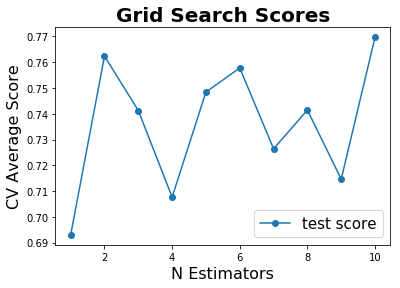

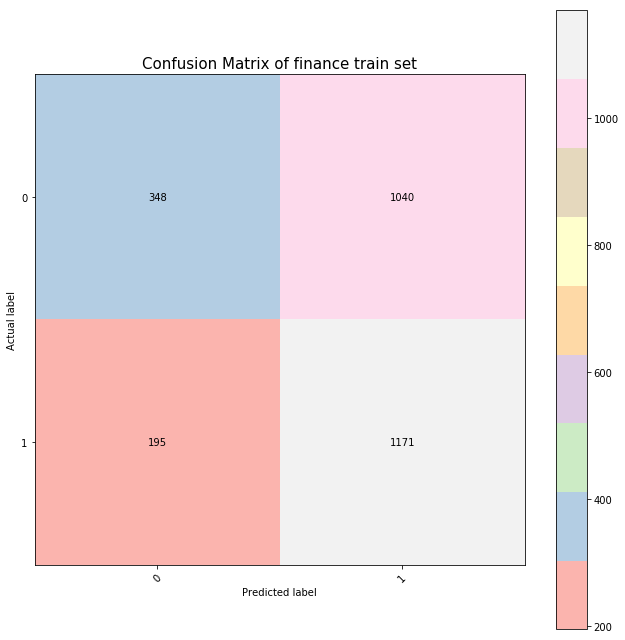

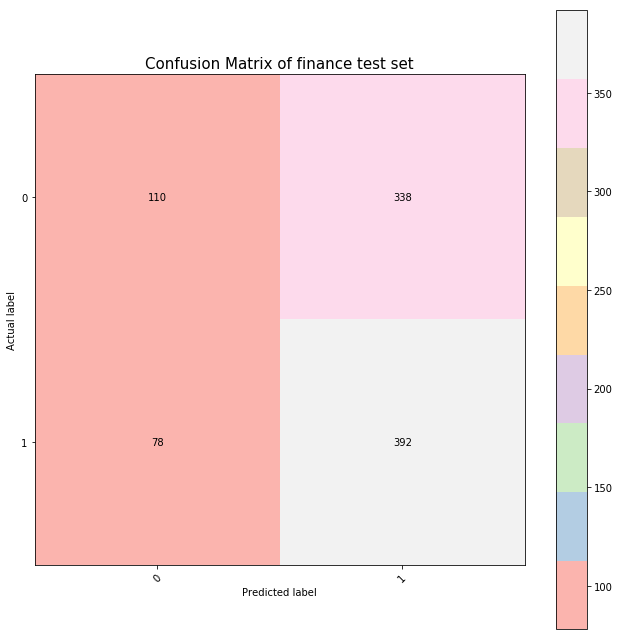

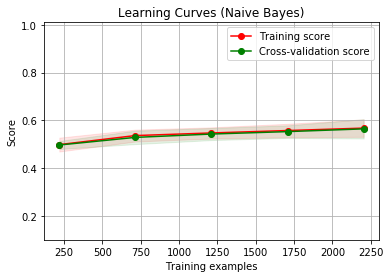

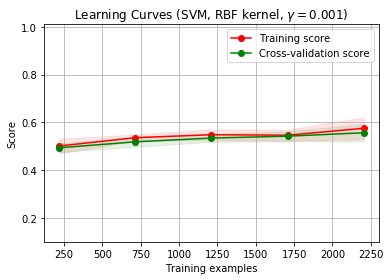

# Tuning hyper-parameters for precision

Iteration 1, loss = 0.93853165
Validation score: 0.494819
Iteration 2, loss = 0.73341985
Validation score: 0.494819
Iteration 3, loss = 0.69361813
Validation score: 0.505181
Iteration 4, loss = 0.68959061
Validation score: 0.505181
Iteration 5, loss = 0.68932785
Validation score: 0.505181
Iteration 6, loss = 0.68927180
Validation score: 0.505181
Iteration 7, loss = 0.68929721
Validation score: 0.505181
Iteration 8, loss = 0.68932714
Validation score: 0.505181
Iteration 9, loss = 0.68929977
Validation score: 0.505181
Iteration 10, loss = 0.68929744
Validation score: 0.505181
Iteration 11, loss = 0.68927496
Validation score: 0.505181
Iteration 12, loss = 0.68928731
Validation score: 0.505181
Iteration 13, loss = 0.68932176
Validation score: 0.505181
Iteration 14, loss = 0.68927766
Validation score: 0.505181
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.93639690
Validation score: 

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

Iteration 14, loss = 0.68971583
Validation score: 0.527202
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.93643245
Validation score: 0.480570
Iteration 2, loss = 0.73363799
Validation score: 0.480570
Iteration 3, loss = 0.69393596
Validation score: 0.519430
Iteration 4, loss = 0.68991072
Validation score: 0.519430
Iteration 5, loss = 0.68966642
Validation score: 0.519430
Iteration 6, loss = 0.68956587
Validation score: 0.519430
Iteration 7, loss = 0.68953946
Validation score: 0.519430
Iteration 8, loss = 0.68955191
Validation score: 0.519430
Iteration 9, loss = 0.68955206
Validation score: 0.519430
Iteration 10, loss = 0.68958664
Validation score: 0.519430
Iteration 11, loss = 0.68956241
Validation score: 0.519430
Iteration 12, loss = 0.68963566
Validation score: 0.519430
Iteration 13, loss = 0.68955877
Validation score: 0.519430
Iteration 14, loss = 0.68954503
Validation score: 0.519430
Validation score did not improv

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

Iteration 1, loss = 0.85886386
Validation score: 0.494819
Iteration 2, loss = 0.69673719
Validation score: 0.505181
Iteration 3, loss = 0.68967302
Validation score: 0.505181
Iteration 4, loss = 0.68928457
Validation score: 0.505181
Iteration 5, loss = 0.68926928
Validation score: 0.505181
Iteration 6, loss = 0.68929130
Validation score: 0.505181
Iteration 7, loss = 0.68928379
Validation score: 0.505181
Iteration 8, loss = 0.68927089
Validation score: 0.505181
Iteration 9, loss = 0.68926086
Validation score: 0.505181
Iteration 10, loss = 0.68926965
Validation score: 0.505181
Iteration 11, loss = 0.68926583
Validation score: 0.505181
Iteration 12, loss = 0.68927166
Validation score: 0.505181
Iteration 13, loss = 0.68931453
Validation score: 0.505181
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.85801614
Validation score: 0.474093
Iteration 2, loss = 0.69684807
Validation score: 0.525907
Iteration 3, loss = 0.69004969
Va

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 3, loss = 0.60666668
Validation score: 0.740933
Iteration 4, loss = 0.56968392
Validation score: 0.779793
Iteration 5, loss = 0.53279368
Validation score: 0.777202
Iteration 6, loss = 0.49810059
Validation score: 0.812176
Iteration 7, loss = 0.46692462
Validation score: 0.822539
Iteration 8, loss = 0.43873240
Validation score: 0.836788
Iteration 9, loss = 0.41337185
Validation score: 0.866580
Iteration 10, loss = 0.39115797
Validation score: 0.857513
Iteration 11, loss = 0.37104683
Validation score: 0.870466
Iteration 12, loss = 0.35339191
Validation score: 0.862694
Iteration 13, loss = 0.33743430
Validation score: 0.876943
Iteration 14, loss = 0.32297547
Validation score: 0.878238
Iteration 15, loss = 0.31004088
Validation score: 0.888601
Iteration 16, loss = 0.29872893
Validation score: 0.876943
Iteration 17, loss = 0.28796535
Validation score: 0.882124
Iteration 18, loss = 0.27808582
Validation score: 0.883420
Iteration 19, loss = 0.26925930
Validation score: 0.888601
Iter

Iteration 23, loss = 0.23806336
Validation score: 0.902850
Iteration 24, loss = 0.23192729
Validation score: 0.902850
Iteration 25, loss = 0.22596558
Validation score: 0.905440
Iteration 26, loss = 0.22046353
Validation score: 0.902850
Iteration 27, loss = 0.21547150
Validation score: 0.909326
Iteration 28, loss = 0.21065511
Validation score: 0.914508
Iteration 29, loss = 0.20636002
Validation score: 0.917098
Iteration 30, loss = 0.20154690
Validation score: 0.914508
Iteration 31, loss = 0.19773673
Validation score: 0.918394
Iteration 32, loss = 0.19365918
Validation score: 0.918394
Iteration 33, loss = 0.19016452
Validation score: 0.920984
Iteration 34, loss = 0.18687305
Validation score: 0.920984
Iteration 35, loss = 0.18306923
Validation score: 0.918394
Iteration 36, loss = 0.18044284
Validation score: 0.920984
Iteration 37, loss = 0.17752605
Validation score: 0.926166
Iteration 38, loss = 0.17436723
Validation score: 0.928756
Iteration 39, loss = 0.17161996
Validation score: 0.9261

Validation score: 0.962435
Iteration 51, loss = 0.15018810
Validation score: 0.955959
Iteration 52, loss = 0.14851039
Validation score: 0.946891
Iteration 53, loss = 0.14719555
Validation score: 0.949482
Iteration 54, loss = 0.14561998
Validation score: 0.957254
Iteration 55, loss = 0.14400410
Validation score: 0.957254
Iteration 56, loss = 0.14259319
Validation score: 0.963731
Iteration 57, loss = 0.14100725
Validation score: 0.958549
Iteration 58, loss = 0.13954770
Validation score: 0.962435
Iteration 59, loss = 0.13870376
Validation score: 0.963731
Iteration 60, loss = 0.13698314
Validation score: 0.959845
Iteration 61, loss = 0.13614990
Validation score: 0.965026
Iteration 62, loss = 0.13442021
Validation score: 0.965026
Iteration 63, loss = 0.13343658
Validation score: 0.967617
Iteration 64, loss = 0.13203060
Validation score: 0.952073
Iteration 65, loss = 0.13089073
Validation score: 0.963731
Iteration 66, loss = 0.12964638
Validation score: 0.954663
Iteration 67, loss = 0.128559

Iteration 1, loss = 0.67353845
Validation score: 0.634715
Iteration 2, loss = 0.64116597
Validation score: 0.739637
Iteration 3, loss = 0.60754171
Validation score: 0.769430
Iteration 4, loss = 0.57206988
Validation score: 0.817358
Iteration 5, loss = 0.53608947
Validation score: 0.838083
Iteration 6, loss = 0.50210688
Validation score: 0.854922
Iteration 7, loss = 0.47105899
Validation score: 0.853627
Iteration 8, loss = 0.44269687
Validation score: 0.858808
Iteration 9, loss = 0.41721430
Validation score: 0.862694
Iteration 10, loss = 0.39441754
Validation score: 0.876943
Iteration 11, loss = 0.37476387
Validation score: 0.876943
Iteration 12, loss = 0.35596218
Validation score: 0.880829
Iteration 13, loss = 0.33962566
Validation score: 0.897668
Iteration 14, loss = 0.32499252
Validation score: 0.901554
Iteration 15, loss = 0.31197524
Validation score: 0.892487
Iteration 16, loss = 0.29970514
Validation score: 0.906736
Iteration 17, loss = 0.28884622
Validation score: 0.906736
Iterat

Iteration 45, loss = 0.16273767
Validation score: 0.946891
Iteration 46, loss = 0.16095147
Validation score: 0.944301
Iteration 47, loss = 0.15946916
Validation score: 0.950777
Iteration 48, loss = 0.15760424
Validation score: 0.949482
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67992153
Validation score: 0.617876
Iteration 2, loss = 0.66633070
Validation score: 0.647668
Iteration 3, loss = 0.65430112
Validation score: 0.693005
Iteration 4, loss = 0.63777103
Validation score: 0.738342
Iteration 5, loss = 0.61559213
Validation score: 0.796632
Iteration 6, loss = 0.58714271
Validation score: 0.825130
Iteration 7, loss = 0.55375662
Validation score: 0.858808
Iteration 8, loss = 0.51749184
Validation score: 0.870466
Iteration 9, loss = 0.48125647
Validation score: 0.886010
Iteration 10, loss = 0.44754839
Validation score: 0.892487
Iteration 11, loss = 0.41621330
Validation score: 0.896373
Iteration 12, loss = 0.38890071

Iteration 8, loss = 0.51750213
Validation score: 0.865285
Iteration 9, loss = 0.48146850
Validation score: 0.875648
Iteration 10, loss = 0.44785015
Validation score: 0.889896
Iteration 11, loss = 0.41676398
Validation score: 0.895078
Iteration 12, loss = 0.38938546
Validation score: 0.906736
Iteration 13, loss = 0.36590950
Validation score: 0.906736
Iteration 14, loss = 0.34537453
Validation score: 0.919689
Iteration 15, loss = 0.32733533
Validation score: 0.913212
Iteration 16, loss = 0.31131105
Validation score: 0.908031
Iteration 17, loss = 0.29769005
Validation score: 0.919689
Iteration 18, loss = 0.28536122
Validation score: 0.920984
Iteration 19, loss = 0.27448773
Validation score: 0.923575
Iteration 20, loss = 0.26516030
Validation score: 0.924870
Iteration 21, loss = 0.25613638
Validation score: 0.924870
Iteration 22, loss = 0.24780956
Validation score: 0.924870
Iteration 23, loss = 0.24038381
Validation score: 0.924870
Iteration 24, loss = 0.23378737
Validation score: 0.926166

Iteration 40, loss = 0.17049041
Validation score: 0.939119
Iteration 41, loss = 0.16760121
Validation score: 0.931347
Iteration 42, loss = 0.16547051
Validation score: 0.943005
Iteration 43, loss = 0.16328208
Validation score: 0.939119
Iteration 44, loss = 0.16098972
Validation score: 0.944301
Iteration 45, loss = 0.15909595
Validation score: 0.945596
Iteration 46, loss = 0.15686471
Validation score: 0.944301
Iteration 47, loss = 0.15507396
Validation score: 0.948187
Iteration 48, loss = 0.15372875
Validation score: 0.945596
Iteration 49, loss = 0.15173393
Validation score: 0.946891
Iteration 50, loss = 0.15014513
Validation score: 0.944301
Iteration 51, loss = 0.14818272
Validation score: 0.946891
Iteration 52, loss = 0.14688996
Validation score: 0.953368
Iteration 53, loss = 0.14533719
Validation score: 0.948187
Iteration 54, loss = 0.14372198
Validation score: 0.953368
Iteration 55, loss = 0.14234474
Validation score: 0.946891
Iteration 56, loss = 0.14083867
Validation score: 0.9572

Iteration 68, loss = 0.12645538
Validation score: 0.965026
Iteration 69, loss = 0.12516308
Validation score: 0.968912
Iteration 70, loss = 0.12407012
Validation score: 0.967617
Iteration 71, loss = 0.12331258
Validation score: 0.967617
Iteration 72, loss = 0.12213618
Validation score: 0.968912
Iteration 73, loss = 0.12080840
Validation score: 0.963731
Iteration 74, loss = 0.12039093
Validation score: 0.968912
Iteration 75, loss = 0.11922747
Validation score: 0.966321
Iteration 76, loss = 0.11862212
Validation score: 0.970207
Iteration 77, loss = 0.11740287
Validation score: 0.970207
Iteration 78, loss = 0.11677462
Validation score: 0.967617
Iteration 79, loss = 0.11572823
Validation score: 0.968912
Iteration 80, loss = 0.11483205
Validation score: 0.970207
Iteration 81, loss = 0.11439254
Validation score: 0.970207
Iteration 82, loss = 0.11327697
Validation score: 0.966321
Iteration 83, loss = 0.11270315
Validation score: 0.968912
Iteration 84, loss = 0.11169655
Validation score: 0.9715

Iteration 108, loss = 0.10185699
Validation score: 0.963731
Iteration 109, loss = 0.10128448
Validation score: 0.970207
Iteration 110, loss = 0.10047790
Validation score: 0.968912
Iteration 111, loss = 0.09978923
Validation score: 0.971503
Iteration 112, loss = 0.09930732
Validation score: 0.971503
Iteration 113, loss = 0.09861146
Validation score: 0.970207
Iteration 114, loss = 0.09798237
Validation score: 0.971503
Iteration 115, loss = 0.09751669
Validation score: 0.965026
Iteration 116, loss = 0.09692724
Validation score: 0.967617
Iteration 117, loss = 0.09617824
Validation score: 0.971503
Iteration 118, loss = 0.09546964
Validation score: 0.974093
Iteration 119, loss = 0.09543550
Validation score: 0.971503
Iteration 120, loss = 0.09447218
Validation score: 0.971503
Iteration 121, loss = 0.09398843
Validation score: 0.974093
Iteration 122, loss = 0.09348749
Validation score: 0.975389
Iteration 123, loss = 0.09276839
Validation score: 0.967617
Iteration 124, loss = 0.09227892
Validat

Validation score: 0.545337
Iteration 7, loss = 0.68753312
Validation score: 0.545337
Iteration 8, loss = 0.66872262
Validation score: 0.545337
Iteration 9, loss = 0.64363968
Validation score: 0.659326
Iteration 10, loss = 0.62462625
Validation score: 0.707254
Iteration 11, loss = 0.60287649
Validation score: 0.760363
Iteration 12, loss = 0.57839698
Validation score: 0.783679
Iteration 13, loss = 0.55166802
Validation score: 0.808290
Iteration 14, loss = 0.52445470
Validation score: 0.826425
Iteration 15, loss = 0.49742210
Validation score: 0.840674
Iteration 16, loss = 0.47143986
Validation score: 0.845855
Iteration 17, loss = 0.44721695
Validation score: 0.853627
Iteration 18, loss = 0.42464420
Validation score: 0.856218
Iteration 19, loss = 0.40363152
Validation score: 0.865285
Iteration 20, loss = 0.38453893
Validation score: 0.865285
Iteration 21, loss = 0.36693487
Validation score: 0.878238
Iteration 22, loss = 0.35110844
Validation score: 0.871762
Iteration 23, loss = 0.33665110


Iteration 79, loss = 0.11700366
Validation score: 0.962435
Iteration 80, loss = 0.11662601
Validation score: 0.962435
Iteration 81, loss = 0.11542039
Validation score: 0.962435
Iteration 82, loss = 0.11453117
Validation score: 0.954663
Iteration 83, loss = 0.11367190
Validation score: 0.962435
Iteration 84, loss = 0.11287625
Validation score: 0.963731
Iteration 85, loss = 0.11231439
Validation score: 0.963731
Iteration 86, loss = 0.11083306
Validation score: 0.955959
Iteration 87, loss = 0.11028192
Validation score: 0.965026
Iteration 88, loss = 0.10938331
Validation score: 0.961140
Iteration 89, loss = 0.10876963
Validation score: 0.963731
Iteration 90, loss = 0.10808088
Validation score: 0.958549
Iteration 91, loss = 0.10661634
Validation score: 0.963731
Iteration 92, loss = 0.10604218
Validation score: 0.963731
Iteration 93, loss = 0.10527142
Validation score: 0.961140
Iteration 94, loss = 0.10454935
Validation score: 0.963731
Iteration 95, loss = 0.10383212
Validation score: 0.9624

Iteration 102, loss = 0.10343418
Validation score: 0.971503
Iteration 103, loss = 0.10294367
Validation score: 0.968912
Iteration 104, loss = 0.10208131
Validation score: 0.972798
Iteration 105, loss = 0.10112022
Validation score: 0.971503
Iteration 106, loss = 0.10098264
Validation score: 0.967617
Iteration 107, loss = 0.10028160
Validation score: 0.968912
Iteration 108, loss = 0.09949510
Validation score: 0.970207
Iteration 109, loss = 0.09863150
Validation score: 0.968912
Iteration 110, loss = 0.09819208
Validation score: 0.972798
Iteration 111, loss = 0.09755700
Validation score: 0.970207
Iteration 112, loss = 0.09690878
Validation score: 0.970207
Iteration 113, loss = 0.09670528
Validation score: 0.972798
Iteration 114, loss = 0.09588065
Validation score: 0.968912
Iteration 115, loss = 0.09512184
Validation score: 0.971503
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69592549
Validation score: 0.511658
Iteration

Iteration 13, loss = 0.47890139
Validation score: 0.861399
Iteration 14, loss = 0.45285190
Validation score: 0.865285
Iteration 15, loss = 0.42844578
Validation score: 0.865285
Iteration 16, loss = 0.40663950
Validation score: 0.880829
Iteration 17, loss = 0.38680437
Validation score: 0.884715
Iteration 18, loss = 0.36866230
Validation score: 0.886010
Iteration 19, loss = 0.35209990
Validation score: 0.895078
Iteration 20, loss = 0.33733121
Validation score: 0.898964
Iteration 21, loss = 0.32362327
Validation score: 0.897668
Iteration 22, loss = 0.31112484
Validation score: 0.901554
Iteration 23, loss = 0.29944243
Validation score: 0.909326
Iteration 24, loss = 0.28914146
Validation score: 0.915803
Iteration 25, loss = 0.27939691
Validation score: 0.919689
Iteration 26, loss = 0.27074752
Validation score: 0.924870
Iteration 27, loss = 0.26252472
Validation score: 0.927461
Iteration 28, loss = 0.25509011
Validation score: 0.928756
Iteration 29, loss = 0.24769434
Validation score: 0.9235

Validation score: 0.580311
Iteration 4, loss = 0.67796339
Validation score: 0.595855
Iteration 5, loss = 0.66990066
Validation score: 0.642487
Iteration 6, loss = 0.65851655
Validation score: 0.681347
Iteration 7, loss = 0.64177003
Validation score: 0.725389
Iteration 8, loss = 0.61864167
Validation score: 0.786269
Iteration 9, loss = 0.59234814
Validation score: 0.791451
Iteration 10, loss = 0.56414288
Validation score: 0.814767
Iteration 11, loss = 0.53508868
Validation score: 0.844560
Iteration 12, loss = 0.50590043
Validation score: 0.845855
Iteration 13, loss = 0.47812086
Validation score: 0.860104
Iteration 14, loss = 0.45141070
Validation score: 0.861399
Iteration 15, loss = 0.42712858
Validation score: 0.871762
Iteration 16, loss = 0.40483274
Validation score: 0.876943
Iteration 17, loss = 0.38474304
Validation score: 0.879534
Iteration 18, loss = 0.36628144
Validation score: 0.888601
Iteration 19, loss = 0.34981465
Validation score: 0.895078
Iteration 20, loss = 0.33462064
Val

Iteration 71, loss = 0.12672449
Validation score: 0.967617
Iteration 72, loss = 0.12555621
Validation score: 0.966321
Iteration 73, loss = 0.12447238
Validation score: 0.967617
Iteration 74, loss = 0.12337129
Validation score: 0.968912
Iteration 75, loss = 0.12227064
Validation score: 0.971503
Iteration 76, loss = 0.12124711
Validation score: 0.971503
Iteration 77, loss = 0.12021634
Validation score: 0.965026
Iteration 78, loss = 0.11939630
Validation score: 0.970207
Iteration 79, loss = 0.11857148
Validation score: 0.970207
Iteration 80, loss = 0.11781886
Validation score: 0.972798
Iteration 81, loss = 0.11743624
Validation score: 0.972798
Iteration 82, loss = 0.11587466
Validation score: 0.970207
Iteration 83, loss = 0.11559990
Validation score: 0.971503
Iteration 84, loss = 0.11437315
Validation score: 0.972798
Iteration 85, loss = 0.11338012
Validation score: 0.972798
Iteration 86, loss = 0.11270896
Validation score: 0.974093
Iteration 87, loss = 0.11187330
Validation score: 0.9753

Validation score: 0.782383
Iteration 5, loss = 0.58535251
Validation score: 0.808290
Iteration 6, loss = 0.55590150
Validation score: 0.822539
Iteration 7, loss = 0.52557183
Validation score: 0.836788
Iteration 8, loss = 0.49551548
Validation score: 0.848446
Iteration 9, loss = 0.46681960
Validation score: 0.848446
Iteration 10, loss = 0.44018608
Validation score: 0.857513
Iteration 11, loss = 0.41604427
Validation score: 0.856218
Iteration 12, loss = 0.39417774
Validation score: 0.865285
Iteration 13, loss = 0.37451590
Validation score: 0.876943
Iteration 14, loss = 0.35673720
Validation score: 0.887306
Iteration 15, loss = 0.34126715
Validation score: 0.875648
Iteration 16, loss = 0.32709620
Validation score: 0.892487
Iteration 17, loss = 0.31352090
Validation score: 0.891192
Iteration 18, loss = 0.30190538
Validation score: 0.893782
Iteration 19, loss = 0.29097692
Validation score: 0.900259
Iteration 20, loss = 0.28111151
Validation score: 0.893782
Iteration 21, loss = 0.27204897
Va

Iteration 73, loss = 0.12216825
Validation score: 0.957254
Iteration 74, loss = 0.12092214
Validation score: 0.957254
Iteration 75, loss = 0.11993695
Validation score: 0.958549
Iteration 76, loss = 0.11883133
Validation score: 0.963731
Iteration 77, loss = 0.11790545
Validation score: 0.954663
Iteration 78, loss = 0.11754642
Validation score: 0.955959
Iteration 79, loss = 0.11607773
Validation score: 0.957254
Iteration 80, loss = 0.11534741
Validation score: 0.965026
Iteration 81, loss = 0.11498513
Validation score: 0.957254
Iteration 82, loss = 0.11371414
Validation score: 0.961140
Iteration 83, loss = 0.11315837
Validation score: 0.950777
Iteration 84, loss = 0.11218734
Validation score: 0.958549
Iteration 85, loss = 0.11103803
Validation score: 0.957254
Iteration 86, loss = 0.11032816
Validation score: 0.962435
Iteration 87, loss = 0.10974912
Validation score: 0.965026
Iteration 88, loss = 0.10891755
Validation score: 0.959845
Iteration 89, loss = 0.10788628
Validation score: 0.9624

Iteration 35, loss = 0.17342044
Validation score: 0.927461
Iteration 36, loss = 0.17056127
Validation score: 0.926166
Iteration 37, loss = 0.16814680
Validation score: 0.930052
Iteration 38, loss = 0.16573682
Validation score: 0.928756
Iteration 39, loss = 0.16396449
Validation score: 0.927461
Iteration 40, loss = 0.16154590
Validation score: 0.927461
Iteration 41, loss = 0.15964172
Validation score: 0.927461
Iteration 42, loss = 0.15758751
Validation score: 0.928756
Iteration 43, loss = 0.15590155
Validation score: 0.930052
Iteration 44, loss = 0.15407084
Validation score: 0.937824
Iteration 45, loss = 0.15231218
Validation score: 0.928756
Iteration 46, loss = 0.15055042
Validation score: 0.939119
Iteration 47, loss = 0.14883588
Validation score: 0.936528
Iteration 48, loss = 0.14734992
Validation score: 0.933938
Iteration 49, loss = 0.14565379
Validation score: 0.933938
Iteration 50, loss = 0.14443718
Validation score: 0.939119
Iteration 51, loss = 0.14325303
Validation score: 0.9404

Iteration 42, loss = 0.15449474
Validation score: 0.927461
Iteration 43, loss = 0.15281422
Validation score: 0.931347
Iteration 44, loss = 0.15066916
Validation score: 0.937824
Iteration 45, loss = 0.14930464
Validation score: 0.936528
Iteration 46, loss = 0.14736595
Validation score: 0.939119
Iteration 47, loss = 0.14570884
Validation score: 0.939119
Iteration 48, loss = 0.14456006
Validation score: 0.935233
Iteration 49, loss = 0.14245330
Validation score: 0.937824
Iteration 50, loss = 0.14112433
Validation score: 0.940415
Iteration 51, loss = 0.13986309
Validation score: 0.937824
Iteration 52, loss = 0.13837884
Validation score: 0.946891
Iteration 53, loss = 0.13722086
Validation score: 0.945596
Iteration 54, loss = 0.13619340
Validation score: 0.941710
Iteration 55, loss = 0.13433612
Validation score: 0.948187
Iteration 56, loss = 0.13314613
Validation score: 0.948187
Iteration 57, loss = 0.13173740
Validation score: 0.950777
Iteration 58, loss = 0.13061264
Validation score: 0.9507

Iteration 93, loss = 0.10400804
Validation score: 0.959845
Iteration 94, loss = 0.10333318
Validation score: 0.963731
Iteration 95, loss = 0.10253736
Validation score: 0.962435
Iteration 96, loss = 0.10194955
Validation score: 0.962435
Iteration 97, loss = 0.10145188
Validation score: 0.959845
Iteration 98, loss = 0.10082385
Validation score: 0.963731
Iteration 99, loss = 0.10029370
Validation score: 0.963731
Iteration 100, loss = 0.09957063
Validation score: 0.962435
Iteration 101, loss = 0.09932761
Validation score: 0.965026
Iteration 102, loss = 0.09860146
Validation score: 0.955959
Iteration 103, loss = 0.09816253
Validation score: 0.967617
Iteration 104, loss = 0.09738947
Validation score: 0.963731
Iteration 105, loss = 0.09666761
Validation score: 0.963731
Iteration 106, loss = 0.09617601
Validation score: 0.965026
Iteration 107, loss = 0.09587194
Validation score: 0.963731
Iteration 108, loss = 0.09531394
Validation score: 0.965026
Iteration 109, loss = 0.09483732
Validation sco

Validation score: 0.966321
Iteration 68, loss = 0.12004500
Validation score: 0.962435
Iteration 69, loss = 0.11884843
Validation score: 0.967617
Iteration 70, loss = 0.11779654
Validation score: 0.966321
Iteration 71, loss = 0.11748986
Validation score: 0.966321
Iteration 72, loss = 0.11623140
Validation score: 0.958549
Iteration 73, loss = 0.11545805
Validation score: 0.962435
Iteration 74, loss = 0.11453926
Validation score: 0.966321
Iteration 75, loss = 0.11354626
Validation score: 0.959845
Iteration 76, loss = 0.11306404
Validation score: 0.968912
Iteration 77, loss = 0.11186507
Validation score: 0.963731
Iteration 78, loss = 0.11131754
Validation score: 0.967617
Iteration 79, loss = 0.11055273
Validation score: 0.967617
Iteration 80, loss = 0.11017942
Validation score: 0.968912
Iteration 81, loss = 0.10908818
Validation score: 0.968912
Iteration 82, loss = 0.10816516
Validation score: 0.968912
Iteration 83, loss = 0.10762973
Validation score: 0.970207
Iteration 84, loss = 0.106861

Iteration 39, loss = 0.15613181
Validation score: 0.950777
Iteration 40, loss = 0.15399378
Validation score: 0.950777
Iteration 41, loss = 0.15196268
Validation score: 0.957254
Iteration 42, loss = 0.14993752
Validation score: 0.950777
Iteration 43, loss = 0.14789782
Validation score: 0.958549
Iteration 44, loss = 0.14649302
Validation score: 0.959845
Iteration 45, loss = 0.14484709
Validation score: 0.957254
Iteration 46, loss = 0.14298031
Validation score: 0.962435
Iteration 47, loss = 0.14148533
Validation score: 0.961140
Iteration 48, loss = 0.13958317
Validation score: 0.955959
Iteration 49, loss = 0.13838234
Validation score: 0.962435
Iteration 50, loss = 0.13653062
Validation score: 0.954663
Iteration 51, loss = 0.13533697
Validation score: 0.961140
Iteration 52, loss = 0.13376220
Validation score: 0.965026
Iteration 53, loss = 0.13240212
Validation score: 0.965026
Iteration 54, loss = 0.13102184
Validation score: 0.963731
Iteration 55, loss = 0.12985261
Validation score: 0.9624

Iteration 9, loss = 0.37572041
Validation score: 0.870466
Iteration 10, loss = 0.34986356
Validation score: 0.882124
Iteration 11, loss = 0.32782099
Validation score: 0.884715
Iteration 12, loss = 0.30959515
Validation score: 0.895078
Iteration 13, loss = 0.29423682
Validation score: 0.887306
Iteration 14, loss = 0.28087874
Validation score: 0.895078
Iteration 15, loss = 0.26891879
Validation score: 0.898964
Iteration 16, loss = 0.25911354
Validation score: 0.906736
Iteration 17, loss = 0.24997917
Validation score: 0.904145
Iteration 18, loss = 0.24160751
Validation score: 0.909326
Iteration 19, loss = 0.23474324
Validation score: 0.918394
Iteration 20, loss = 0.22746778
Validation score: 0.915803
Iteration 21, loss = 0.22122863
Validation score: 0.918394
Iteration 22, loss = 0.21533283
Validation score: 0.923575
Iteration 23, loss = 0.20966821
Validation score: 0.922280
Iteration 24, loss = 0.20571524
Validation score: 0.924870
Iteration 25, loss = 0.20048598
Validation score: 0.92746

Validation score: 0.904145
Iteration 19, loss = 0.23194074
Validation score: 0.910622
Iteration 20, loss = 0.22539234
Validation score: 0.910622
Iteration 21, loss = 0.21896756
Validation score: 0.911917
Iteration 22, loss = 0.21362570
Validation score: 0.915803
Iteration 23, loss = 0.20798526
Validation score: 0.919689
Iteration 24, loss = 0.20353387
Validation score: 0.914508
Iteration 25, loss = 0.19872069
Validation score: 0.919689
Iteration 26, loss = 0.19484787
Validation score: 0.915803
Iteration 27, loss = 0.19031320
Validation score: 0.918394
Iteration 28, loss = 0.18693302
Validation score: 0.922280
Iteration 29, loss = 0.18286933
Validation score: 0.922280
Iteration 30, loss = 0.17923424
Validation score: 0.924870
Iteration 31, loss = 0.17625365
Validation score: 0.926166
Iteration 32, loss = 0.17348263
Validation score: 0.931347
Iteration 33, loss = 0.17029408
Validation score: 0.927461
Iteration 34, loss = 0.16747146
Validation score: 0.936528
Iteration 35, loss = 0.164745

Iteration 69, loss = 0.11966389
Validation score: 0.963731
Iteration 70, loss = 0.11855792
Validation score: 0.976684
Iteration 71, loss = 0.11845698
Validation score: 0.967617
Iteration 72, loss = 0.11689391
Validation score: 0.974093
Iteration 73, loss = 0.11590284
Validation score: 0.966321
Iteration 74, loss = 0.11491984
Validation score: 0.974093
Iteration 75, loss = 0.11399854
Validation score: 0.968912
Iteration 76, loss = 0.11315171
Validation score: 0.967617
Iteration 77, loss = 0.11245902
Validation score: 0.972798
Iteration 78, loss = 0.11244778
Validation score: 0.968912
Iteration 79, loss = 0.11066449
Validation score: 0.976684
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68292864
Validation score: 0.577720
Iteration 2, loss = 0.65214272
Validation score: 0.722798
Iteration 3, loss = 0.62526092
Validation score: 0.795337
Iteration 4, loss = 0.59364019
Validation score: 0.797927
Iteration 5, loss = 0.5564

Iteration 63, loss = 0.12395796
Validation score: 0.949482
Iteration 64, loss = 0.12296652
Validation score: 0.949482
Iteration 65, loss = 0.12222607
Validation score: 0.950777
Iteration 66, loss = 0.12101742
Validation score: 0.952073
Iteration 67, loss = 0.12014896
Validation score: 0.949482
Iteration 68, loss = 0.11940312
Validation score: 0.952073
Iteration 69, loss = 0.11805837
Validation score: 0.952073
Iteration 70, loss = 0.11722714
Validation score: 0.955959
Iteration 71, loss = 0.11719713
Validation score: 0.955959
Iteration 72, loss = 0.11590184
Validation score: 0.959845
Iteration 73, loss = 0.11494784
Validation score: 0.955959
Iteration 74, loss = 0.11372869
Validation score: 0.963731
Iteration 75, loss = 0.11295939
Validation score: 0.954663
Iteration 76, loss = 0.11229840
Validation score: 0.954663
Iteration 77, loss = 0.11131737
Validation score: 0.954663
Iteration 78, loss = 0.11091553
Validation score: 0.957254
Iteration 79, loss = 0.10996740
Validation score: 0.9585

Iteration 20, loss = 0.23206626
Validation score: 0.920984
Iteration 21, loss = 0.22517805
Validation score: 0.920984
Iteration 22, loss = 0.21894656
Validation score: 0.920984
Iteration 23, loss = 0.21330676
Validation score: 0.920984
Iteration 24, loss = 0.20806197
Validation score: 0.924870
Iteration 25, loss = 0.20287601
Validation score: 0.930052
Iteration 26, loss = 0.19810704
Validation score: 0.919689
Iteration 27, loss = 0.19412902
Validation score: 0.933938
Iteration 28, loss = 0.19001430
Validation score: 0.931347
Iteration 29, loss = 0.18615949
Validation score: 0.937824
Iteration 30, loss = 0.18257721
Validation score: 0.940415
Iteration 31, loss = 0.17917263
Validation score: 0.937824
Iteration 32, loss = 0.17591108
Validation score: 0.936528
Iteration 33, loss = 0.17305592
Validation score: 0.944301
Iteration 34, loss = 0.17020495
Validation score: 0.944301
Iteration 35, loss = 0.16735902
Validation score: 0.933938
Iteration 36, loss = 0.16509934
Validation score: 0.9404

Iteration 84, loss = 0.09694167
Validation score: 0.973057
Iteration 85, loss = 0.09606954
Validation score: 0.970984
Iteration 86, loss = 0.09516223
Validation score: 0.975130
Iteration 87, loss = 0.09472212
Validation score: 0.970984
Iteration 88, loss = 0.09392185
Validation score: 0.973057
Iteration 89, loss = 0.09324078
Validation score: 0.974093
Iteration 90, loss = 0.09307520
Validation score: 0.974093
Iteration 91, loss = 0.09262245
Validation score: 0.970984
Iteration 92, loss = 0.09145686
Validation score: 0.976166
Iteration 93, loss = 0.09085614
Validation score: 0.974093
Iteration 94, loss = 0.09016897
Validation score: 0.976166
Iteration 95, loss = 0.08988389
Validation score: 0.974093
Iteration 96, loss = 0.08900161
Validation score: 0.975130
Iteration 97, loss = 0.08852370
Validation score: 0.976166
Iteration 98, loss = 0.08810096
Validation score: 0.976166
Iteration 99, loss = 0.08758701
Validation score: 0.975130
Iteration 100, loss = 0.08672629
Validation score: 0.976

Iteration 4, loss = 0.68908011
Validation score: 0.496114
Iteration 5, loss = 0.68911668
Validation score: 0.496114
Iteration 6, loss = 0.68910843
Validation score: 0.496114
Iteration 7, loss = 0.68911206
Validation score: 0.496114
Iteration 8, loss = 0.68908534
Validation score: 0.496114
Iteration 9, loss = 0.68909232
Validation score: 0.496114
Iteration 10, loss = 0.68909173
Validation score: 0.496114
Iteration 11, loss = 0.68910367
Validation score: 0.496114
Iteration 12, loss = 0.68910529
Validation score: 0.496114
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.85886386
Validation score: 0.494819
Iteration 2, loss = 0.69673719
Validation score: 0.505181
Iteration 3, loss = 0.68967302
Validation score: 0.505181
Iteration 4, loss = 0.68928457
Validation score: 0.505181
Iteration 5, loss = 0.68926928
Validation score: 0.505181
Iteration 6, loss = 0.68929130
Validation score: 0.505181
Iteration 7, loss = 0.68928379
Val

Iteration 77, loss = 0.11793917
Validation score: 0.959845
Iteration 78, loss = 0.11691391
Validation score: 0.954663
Iteration 79, loss = 0.11602837
Validation score: 0.954663
Iteration 80, loss = 0.11514846
Validation score: 0.961140
Iteration 81, loss = 0.11431127
Validation score: 0.959845
Iteration 82, loss = 0.11358923
Validation score: 0.954663
Iteration 83, loss = 0.11290703
Validation score: 0.959845
Iteration 84, loss = 0.11216049
Validation score: 0.961140
Iteration 85, loss = 0.11114012
Validation score: 0.957254
Iteration 86, loss = 0.11074011
Validation score: 0.963731
Iteration 87, loss = 0.10987625
Validation score: 0.962435
Iteration 88, loss = 0.10884998
Validation score: 0.957254
Iteration 89, loss = 0.10804554
Validation score: 0.957254
Iteration 90, loss = 0.10770114
Validation score: 0.962435
Iteration 91, loss = 0.10682029
Validation score: 0.962435
Iteration 92, loss = 0.10604803
Validation score: 0.962435
Iteration 93, loss = 0.10504877
Validation score: 0.9637

Validation score: 0.946891
Iteration 72, loss = 0.12002172
Validation score: 0.949482
Iteration 73, loss = 0.11913583
Validation score: 0.943005
Iteration 74, loss = 0.11851653
Validation score: 0.955959
Iteration 75, loss = 0.11732859
Validation score: 0.948187
Iteration 76, loss = 0.11678465
Validation score: 0.961140
Iteration 77, loss = 0.11553781
Validation score: 0.957254
Iteration 78, loss = 0.11444525
Validation score: 0.945596
Iteration 79, loss = 0.11376182
Validation score: 0.952073
Iteration 80, loss = 0.11294931
Validation score: 0.959845
Iteration 81, loss = 0.11199037
Validation score: 0.962435
Iteration 82, loss = 0.11131159
Validation score: 0.946891
Iteration 83, loss = 0.11064393
Validation score: 0.945596
Iteration 84, loss = 0.10971827
Validation score: 0.962435
Iteration 85, loss = 0.10884440
Validation score: 0.962435
Iteration 86, loss = 0.10813925
Validation score: 0.966321
Iteration 87, loss = 0.10753543
Validation score: 0.962435
Iteration 88, loss = 0.106679

Iteration 1, loss = 0.67436434
Validation score: 0.597150
Iteration 2, loss = 0.64273317
Validation score: 0.708549
Iteration 3, loss = 0.60910787
Validation score: 0.768135
Iteration 4, loss = 0.57357253
Validation score: 0.816062
Iteration 5, loss = 0.53773504
Validation score: 0.817358
Iteration 6, loss = 0.50399651
Validation score: 0.832902
Iteration 7, loss = 0.47277766
Validation score: 0.838083
Iteration 8, loss = 0.44462259
Validation score: 0.841969
Iteration 9, loss = 0.41908590
Validation score: 0.841969
Iteration 10, loss = 0.39599937
Validation score: 0.857513
Iteration 11, loss = 0.37562090
Validation score: 0.852332
Iteration 12, loss = 0.35699833
Validation score: 0.866580
Iteration 13, loss = 0.34064612
Validation score: 0.878238
Iteration 14, loss = 0.32563255
Validation score: 0.882124
Iteration 15, loss = 0.31240964
Validation score: 0.892487
Iteration 16, loss = 0.30066053
Validation score: 0.889896
Iteration 17, loss = 0.28924061
Validation score: 0.889896
Iterat

Iteration 49, loss = 0.15110470
Validation score: 0.962435
Iteration 50, loss = 0.14890868
Validation score: 0.961140
Iteration 51, loss = 0.14733001
Validation score: 0.962435
Iteration 52, loss = 0.14580767
Validation score: 0.967617
Iteration 53, loss = 0.14377792
Validation score: 0.967617
Iteration 54, loss = 0.14267417
Validation score: 0.963731
Iteration 55, loss = 0.14073204
Validation score: 0.971503
Iteration 56, loss = 0.13947068
Validation score: 0.965026
Iteration 57, loss = 0.13770780
Validation score: 0.970207
Iteration 58, loss = 0.13647055
Validation score: 0.966321
Iteration 59, loss = 0.13486672
Validation score: 0.971503
Iteration 60, loss = 0.13400478
Validation score: 0.974093
Iteration 61, loss = 0.13256427
Validation score: 0.974093
Iteration 62, loss = 0.13120291
Validation score: 0.967617
Iteration 63, loss = 0.13000110
Validation score: 0.970207
Iteration 64, loss = 0.12873033
Validation score: 0.974093
Iteration 65, loss = 0.12765327
Validation score: 0.9740

Iteration 44, loss = 0.16118306
Validation score: 0.944301
Iteration 45, loss = 0.15918090
Validation score: 0.939119
Iteration 46, loss = 0.15753202
Validation score: 0.940415
Iteration 47, loss = 0.15587882
Validation score: 0.941710
Iteration 48, loss = 0.15374288
Validation score: 0.949482
Iteration 49, loss = 0.15172418
Validation score: 0.946891
Iteration 50, loss = 0.14997887
Validation score: 0.941710
Iteration 51, loss = 0.14849255
Validation score: 0.941710
Iteration 52, loss = 0.14701726
Validation score: 0.949482
Iteration 53, loss = 0.14530002
Validation score: 0.940415
Iteration 54, loss = 0.14393217
Validation score: 0.950777
Iteration 55, loss = 0.14239320
Validation score: 0.943005
Iteration 56, loss = 0.14092415
Validation score: 0.943005
Iteration 57, loss = 0.13954864
Validation score: 0.948187
Iteration 58, loss = 0.13831238
Validation score: 0.953368
Iteration 59, loss = 0.13684799
Validation score: 0.955959
Iteration 60, loss = 0.13640853
Validation score: 0.9572

Iteration 57, loss = 0.14164668
Validation score: 0.955959
Iteration 58, loss = 0.14061507
Validation score: 0.948187
Iteration 59, loss = 0.13928622
Validation score: 0.959845
Iteration 60, loss = 0.13805858
Validation score: 0.961140
Iteration 61, loss = 0.13642985
Validation score: 0.948187
Iteration 62, loss = 0.13601108
Validation score: 0.961140
Iteration 63, loss = 0.13437314
Validation score: 0.959845
Iteration 64, loss = 0.13330619
Validation score: 0.954663
Iteration 65, loss = 0.13209102
Validation score: 0.961140
Iteration 66, loss = 0.13077283
Validation score: 0.962435
Iteration 67, loss = 0.13000485
Validation score: 0.963731
Iteration 68, loss = 0.12900148
Validation score: 0.962435
Iteration 69, loss = 0.12778692
Validation score: 0.962435
Iteration 70, loss = 0.12676044
Validation score: 0.954663
Iteration 71, loss = 0.12653329
Validation score: 0.963731
Iteration 72, loss = 0.12468907
Validation score: 0.950777
Iteration 73, loss = 0.12435563
Validation score: 0.9650

Iteration 90, loss = 0.10758190
Validation score: 0.965026
Iteration 91, loss = 0.10701355
Validation score: 0.963731
Iteration 92, loss = 0.10644559
Validation score: 0.967617
Iteration 93, loss = 0.10619479
Validation score: 0.966321
Iteration 94, loss = 0.10483131
Validation score: 0.965026
Iteration 95, loss = 0.10436582
Validation score: 0.967617
Iteration 96, loss = 0.10385649
Validation score: 0.966321
Iteration 97, loss = 0.10300429
Validation score: 0.963731
Iteration 98, loss = 0.10252581
Validation score: 0.966321
Iteration 99, loss = 0.10159407
Validation score: 0.968912
Iteration 100, loss = 0.10134341
Validation score: 0.966321
Iteration 101, loss = 0.10081463
Validation score: 0.968912
Iteration 102, loss = 0.09979599
Validation score: 0.961140
Iteration 103, loss = 0.09968634
Validation score: 0.963731
Iteration 104, loss = 0.09918458
Validation score: 0.963731
Iteration 105, loss = 0.09836091
Validation score: 0.962435
Iteration 106, loss = 0.09798458
Validation score:

Iteration 1, loss = 0.73061153
Validation score: 0.502591
Iteration 2, loss = 0.69368696
Validation score: 0.502591
Iteration 3, loss = 0.68956790
Validation score: 0.502591
Iteration 4, loss = 0.68922203
Validation score: 0.502591
Iteration 5, loss = 0.68898630
Validation score: 0.502591
Iteration 6, loss = 0.68856934
Validation score: 0.502591
Iteration 7, loss = 0.68681646
Validation score: 0.502591
Iteration 8, loss = 0.66802650
Validation score: 0.502591
Iteration 9, loss = 0.64239006
Validation score: 0.626943
Iteration 10, loss = 0.62287052
Validation score: 0.680052
Iteration 11, loss = 0.60025030
Validation score: 0.734456
Iteration 12, loss = 0.57485979
Validation score: 0.750000
Iteration 13, loss = 0.54766132
Validation score: 0.787565
Iteration 14, loss = 0.52002656
Validation score: 0.805699
Iteration 15, loss = 0.49253391
Validation score: 0.818653
Iteration 16, loss = 0.46666027
Validation score: 0.822539
Iteration 17, loss = 0.44239413
Validation score: 0.841969
Iterat

Iteration 9, loss = 0.64864645
Validation score: 0.522021
Iteration 10, loss = 0.62999007
Validation score: 0.685233
Iteration 11, loss = 0.60887643
Validation score: 0.737047
Iteration 12, loss = 0.58493263
Validation score: 0.762953
Iteration 13, loss = 0.55840543
Validation score: 0.794041
Iteration 14, loss = 0.53108084
Validation score: 0.813472
Iteration 15, loss = 0.50351988
Validation score: 0.829016
Iteration 16, loss = 0.47712374
Validation score: 0.832902
Iteration 17, loss = 0.45244979
Validation score: 0.840674
Iteration 18, loss = 0.42963773
Validation score: 0.848446
Iteration 19, loss = 0.40797308
Validation score: 0.848446
Iteration 20, loss = 0.38888204
Validation score: 0.860104
Iteration 21, loss = 0.37091032
Validation score: 0.866580
Iteration 22, loss = 0.35466894
Validation score: 0.862694
Iteration 23, loss = 0.34022832
Validation score: 0.871762
Iteration 24, loss = 0.32627821
Validation score: 0.874352
Iteration 25, loss = 0.31363118
Validation score: 0.87694

Iteration 67, loss = 0.14143271
Validation score: 0.959845
Iteration 68, loss = 0.14030388
Validation score: 0.954663
Iteration 69, loss = 0.13853236
Validation score: 0.961140
Iteration 70, loss = 0.13697491
Validation score: 0.959845
Iteration 71, loss = 0.13622050
Validation score: 0.958549
Iteration 72, loss = 0.13475081
Validation score: 0.959845
Iteration 73, loss = 0.13313819
Validation score: 0.948187
Iteration 74, loss = 0.13220952
Validation score: 0.945596
Iteration 75, loss = 0.13087878
Validation score: 0.946891
Iteration 76, loss = 0.13026034
Validation score: 0.954663
Iteration 77, loss = 0.12889750
Validation score: 0.963731
Iteration 78, loss = 0.12852852
Validation score: 0.962435
Iteration 79, loss = 0.12663943
Validation score: 0.966321
Iteration 80, loss = 0.12578090
Validation score: 0.961140
Iteration 81, loss = 0.12498154
Validation score: 0.958549
Iteration 82, loss = 0.12359793
Validation score: 0.957254
Iteration 83, loss = 0.12251034
Validation score: 0.9533

Iteration 10, loss = 0.61905846
Validation score: 0.713731
Iteration 11, loss = 0.59643071
Validation score: 0.762953
Iteration 12, loss = 0.57106424
Validation score: 0.791451
Iteration 13, loss = 0.54392238
Validation score: 0.814767
Iteration 14, loss = 0.51651924
Validation score: 0.830311
Iteration 15, loss = 0.48922151
Validation score: 0.835492
Iteration 16, loss = 0.46369646
Validation score: 0.843264
Iteration 17, loss = 0.43984046
Validation score: 0.852332
Iteration 18, loss = 0.41712654
Validation score: 0.853627
Iteration 19, loss = 0.39684308
Validation score: 0.857513
Iteration 20, loss = 0.37829295
Validation score: 0.863990
Iteration 21, loss = 0.36102748
Validation score: 0.867876
Iteration 22, loss = 0.34511181
Validation score: 0.873057
Iteration 23, loss = 0.33092108
Validation score: 0.871762
Iteration 24, loss = 0.31773619
Validation score: 0.874352
Iteration 25, loss = 0.30552417
Validation score: 0.878238
Iteration 26, loss = 0.29471181
Validation score: 0.8873

Validation score: 0.920984
Iteration 34, loss = 0.21792670
Validation score: 0.923575
Iteration 35, loss = 0.21348461
Validation score: 0.927461
Iteration 36, loss = 0.20891188
Validation score: 0.926166
Iteration 37, loss = 0.20473485
Validation score: 0.931347
Iteration 38, loss = 0.20085527
Validation score: 0.927461
Iteration 39, loss = 0.19718821
Validation score: 0.928756
Iteration 40, loss = 0.19360951
Validation score: 0.932642
Iteration 41, loss = 0.19014175
Validation score: 0.933938
Iteration 42, loss = 0.18726730
Validation score: 0.937824
Iteration 43, loss = 0.18428810
Validation score: 0.933938
Iteration 44, loss = 0.18092477
Validation score: 0.936528
Iteration 45, loss = 0.17814204
Validation score: 0.936528
Iteration 46, loss = 0.17521072
Validation score: 0.939119
Iteration 47, loss = 0.17288854
Validation score: 0.937824
Iteration 48, loss = 0.17025692
Validation score: 0.937824
Iteration 49, loss = 0.16806345
Validation score: 0.944301
Iteration 50, loss = 0.166200

Iteration 60, loss = 0.14733663
Validation score: 0.961140
Iteration 61, loss = 0.14568050
Validation score: 0.957254
Iteration 62, loss = 0.14445739
Validation score: 0.959845
Iteration 63, loss = 0.14297887
Validation score: 0.957254
Iteration 64, loss = 0.14137332
Validation score: 0.958549
Iteration 65, loss = 0.14001905
Validation score: 0.959845
Iteration 66, loss = 0.13899259
Validation score: 0.961140
Iteration 67, loss = 0.13751453
Validation score: 0.959845
Iteration 68, loss = 0.13613652
Validation score: 0.961140
Iteration 69, loss = 0.13492749
Validation score: 0.959845
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69804655
Validation score: 0.542746
Iteration 2, loss = 0.68960075
Validation score: 0.580311
Iteration 3, loss = 0.68408731
Validation score: 0.599741
Iteration 4, loss = 0.67800853
Validation score: 0.610104
Iteration 5, loss = 0.67056105
Validation score: 0.628238
Iteration 6, loss = 0.65995

Iteration 66, loss = 0.13497449
Validation score: 0.962435
Iteration 67, loss = 0.13346413
Validation score: 0.967617
Iteration 68, loss = 0.13251007
Validation score: 0.948187
Iteration 69, loss = 0.13141065
Validation score: 0.968912
Iteration 70, loss = 0.12972857
Validation score: 0.967617
Iteration 71, loss = 0.12881215
Validation score: 0.963731
Iteration 72, loss = 0.12773971
Validation score: 0.954663
Iteration 73, loss = 0.12650419
Validation score: 0.967617
Iteration 74, loss = 0.12531022
Validation score: 0.966321
Iteration 75, loss = 0.12411025
Validation score: 0.970207
Iteration 76, loss = 0.12322538
Validation score: 0.971503
Iteration 77, loss = 0.12224277
Validation score: 0.965026
Iteration 78, loss = 0.12111235
Validation score: 0.967617
Iteration 79, loss = 0.12002352
Validation score: 0.972798
Iteration 80, loss = 0.11911450
Validation score: 0.966321
Iteration 81, loss = 0.11807943
Validation score: 0.974093
Iteration 82, loss = 0.11745962
Validation score: 0.9689

Iteration 133, loss = 0.08599631
Validation score: 0.989637
Iteration 134, loss = 0.08526163
Validation score: 0.984456
Iteration 135, loss = 0.08467605
Validation score: 0.985751
Iteration 136, loss = 0.08461512
Validation score: 0.987047
Iteration 137, loss = 0.08414235
Validation score: 0.987047
Iteration 138, loss = 0.08347234
Validation score: 0.987047
Iteration 139, loss = 0.08310564
Validation score: 0.987047
Iteration 140, loss = 0.08283657
Validation score: 0.984456
Iteration 141, loss = 0.08240141
Validation score: 0.990933
Iteration 142, loss = 0.08224070
Validation score: 0.979275
Iteration 143, loss = 0.08199174
Validation score: 0.989637
Iteration 144, loss = 0.08130033
Validation score: 0.988342
Iteration 145, loss = 0.08150670
Validation score: 0.981865
Iteration 146, loss = 0.08080147
Validation score: 0.987047
Iteration 147, loss = 0.08022925
Validation score: 0.988342
Iteration 148, loss = 0.08007555
Validation score: 0.988342
Iteration 149, loss = 0.07944774
Validat

Iteration 66, loss = 0.13169204
Validation score: 0.962435
Iteration 67, loss = 0.13058885
Validation score: 0.957254
Iteration 68, loss = 0.12977648
Validation score: 0.955959
Iteration 69, loss = 0.12838577
Validation score: 0.963731
Iteration 70, loss = 0.12730351
Validation score: 0.963731
Iteration 71, loss = 0.12614274
Validation score: 0.966321
Iteration 72, loss = 0.12533076
Validation score: 0.967617
Iteration 73, loss = 0.12417844
Validation score: 0.967617
Iteration 74, loss = 0.12320325
Validation score: 0.963731
Iteration 75, loss = 0.12215838
Validation score: 0.965026
Iteration 76, loss = 0.12116421
Validation score: 0.961140
Iteration 77, loss = 0.12027137
Validation score: 0.962435
Iteration 78, loss = 0.11935159
Validation score: 0.972798
Iteration 79, loss = 0.11867694
Validation score: 0.966321
Iteration 80, loss = 0.11759200
Validation score: 0.972798
Iteration 81, loss = 0.11651291
Validation score: 0.974093
Iteration 82, loss = 0.11565560
Validation score: 0.9702

Iteration 44, loss = 0.16592885
Validation score: 0.953368
Iteration 45, loss = 0.16357794
Validation score: 0.957254
Iteration 46, loss = 0.16124299
Validation score: 0.955959
Iteration 47, loss = 0.15911510
Validation score: 0.958549
Iteration 48, loss = 0.15680474
Validation score: 0.963731
Iteration 49, loss = 0.15525601
Validation score: 0.965026
Iteration 50, loss = 0.15342618
Validation score: 0.965026
Iteration 51, loss = 0.15157517
Validation score: 0.962435
Iteration 52, loss = 0.14922164
Validation score: 0.963731
Iteration 53, loss = 0.14802829
Validation score: 0.966321
Iteration 54, loss = 0.14629539
Validation score: 0.966321
Iteration 55, loss = 0.14410795
Validation score: 0.966321
Iteration 56, loss = 0.14317668
Validation score: 0.968912
Iteration 57, loss = 0.14117086
Validation score: 0.970207
Iteration 58, loss = 0.13986140
Validation score: 0.967617
Iteration 59, loss = 0.13818218
Validation score: 0.967617
Iteration 60, loss = 0.13700986
Validation score: 0.9676

Iteration 118, loss = 0.08968804
Validation score: 0.972798
Iteration 119, loss = 0.08922102
Validation score: 0.974093
Iteration 120, loss = 0.08870549
Validation score: 0.971503
Iteration 121, loss = 0.08809305
Validation score: 0.974093
Iteration 122, loss = 0.08819696
Validation score: 0.974093
Iteration 123, loss = 0.08770141
Validation score: 0.970207
Iteration 124, loss = 0.08756243
Validation score: 0.974093
Iteration 125, loss = 0.08652097
Validation score: 0.975389
Iteration 126, loss = 0.08600816
Validation score: 0.975389
Iteration 127, loss = 0.08605092
Validation score: 0.971503
Iteration 128, loss = 0.08546815
Validation score: 0.974093
Iteration 129, loss = 0.08494848
Validation score: 0.972798
Iteration 130, loss = 0.08442919
Validation score: 0.975389
Iteration 131, loss = 0.08400831
Validation score: 0.967617
Iteration 132, loss = 0.08405505
Validation score: 0.972798
Iteration 133, loss = 0.08403414
Validation score: 0.977979
Iteration 134, loss = 0.08319420
Validat

Iteration 21, loss = 0.22966021
Validation score: 0.896373
Iteration 22, loss = 0.22324847
Validation score: 0.904145
Iteration 23, loss = 0.21689903
Validation score: 0.908031
Iteration 24, loss = 0.21107778
Validation score: 0.918394
Iteration 25, loss = 0.20670254
Validation score: 0.909326
Iteration 26, loss = 0.20168759
Validation score: 0.901554
Iteration 27, loss = 0.19768424
Validation score: 0.915803
Iteration 28, loss = 0.19395130
Validation score: 0.917098
Iteration 29, loss = 0.18997121
Validation score: 0.919689
Iteration 30, loss = 0.18645924
Validation score: 0.919689
Iteration 31, loss = 0.18317182
Validation score: 0.914508
Iteration 32, loss = 0.18014488
Validation score: 0.919689
Iteration 33, loss = 0.17686231
Validation score: 0.918394
Iteration 34, loss = 0.17451856
Validation score: 0.924870
Iteration 35, loss = 0.17151862
Validation score: 0.922280
Iteration 36, loss = 0.16901981
Validation score: 0.926166
Iteration 37, loss = 0.16651402
Validation score: 0.9261

Iteration 68, loss = 0.12087444
Validation score: 0.950777
Iteration 69, loss = 0.12092387
Validation score: 0.958549
Iteration 70, loss = 0.11908685
Validation score: 0.958549
Iteration 71, loss = 0.11799295
Validation score: 0.950777
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72848265
Validation score: 0.597150
Iteration 2, loss = 0.66594946
Validation score: 0.642487
Iteration 3, loss = 0.65118307
Validation score: 0.683938
Iteration 4, loss = 0.63209590
Validation score: 0.733161
Iteration 5, loss = 0.60452455
Validation score: 0.777202
Iteration 6, loss = 0.56580885
Validation score: 0.818653
Iteration 7, loss = 0.52415817
Validation score: 0.836788
Iteration 8, loss = 0.48321848
Validation score: 0.854922
Iteration 9, loss = 0.44402859
Validation score: 0.871762
Iteration 10, loss = 0.40862734
Validation score: 0.879534
Iteration 11, loss = 0.37770812
Validation score: 0.888601
Iteration 12, loss = 0.35131879

Iteration 49, loss = 0.14169803
Validation score: 0.963731
Iteration 50, loss = 0.13976323
Validation score: 0.966321
Iteration 51, loss = 0.13857838
Validation score: 0.966321
Iteration 52, loss = 0.13708757
Validation score: 0.967617
Iteration 53, loss = 0.13555718
Validation score: 0.966321
Iteration 54, loss = 0.13438917
Validation score: 0.967617
Iteration 55, loss = 0.13311457
Validation score: 0.967617
Iteration 56, loss = 0.13210046
Validation score: 0.970207
Iteration 57, loss = 0.13072752
Validation score: 0.970207
Iteration 58, loss = 0.12921928
Validation score: 0.968912
Iteration 59, loss = 0.12826881
Validation score: 0.966321
Iteration 60, loss = 0.12728780
Validation score: 0.972798
Iteration 61, loss = 0.12612383
Validation score: 0.971503
Iteration 62, loss = 0.12497126
Validation score: 0.970207
Iteration 63, loss = 0.12406131
Validation score: 0.968912
Iteration 64, loss = 0.12359302
Validation score: 0.966321
Iteration 65, loss = 0.12187605
Validation score: 0.9715

Iteration 26, loss = 0.19664152
Validation score: 0.924870
Iteration 27, loss = 0.19211423
Validation score: 0.927461
Iteration 28, loss = 0.18866381
Validation score: 0.922280
Iteration 29, loss = 0.18505592
Validation score: 0.919689
Iteration 30, loss = 0.18172549
Validation score: 0.928756
Iteration 31, loss = 0.17840910
Validation score: 0.930052
Iteration 32, loss = 0.17525203
Validation score: 0.932642
Iteration 33, loss = 0.17238047
Validation score: 0.935233
Iteration 34, loss = 0.16999451
Validation score: 0.936528
Iteration 35, loss = 0.16689576
Validation score: 0.940415
Iteration 36, loss = 0.16427463
Validation score: 0.940415
Iteration 37, loss = 0.16197952
Validation score: 0.941710
Iteration 38, loss = 0.16002655
Validation score: 0.943005
Iteration 39, loss = 0.15750601
Validation score: 0.948187
Iteration 40, loss = 0.15538835
Validation score: 0.949482
Iteration 41, loss = 0.15397039
Validation score: 0.945596
Iteration 42, loss = 0.15144928
Validation score: 0.9455

Iteration 106, loss = 0.09042548
Validation score: 0.971503
Iteration 107, loss = 0.09005558
Validation score: 0.976684
Iteration 108, loss = 0.08923809
Validation score: 0.974093
Iteration 109, loss = 0.08942122
Validation score: 0.976684
Iteration 110, loss = 0.08837861
Validation score: 0.972798
Iteration 111, loss = 0.08806218
Validation score: 0.976684
Iteration 112, loss = 0.08750018
Validation score: 0.976684
Iteration 113, loss = 0.08705231
Validation score: 0.977979
Iteration 114, loss = 0.08631876
Validation score: 0.974093
Iteration 115, loss = 0.08600045
Validation score: 0.977979
Iteration 116, loss = 0.08590138
Validation score: 0.965026
Iteration 117, loss = 0.08523927
Validation score: 0.979275
Iteration 118, loss = 0.08501034
Validation score: 0.979275
Iteration 119, loss = 0.08462731
Validation score: 0.976684
Iteration 120, loss = 0.08393768
Validation score: 0.979275
Iteration 121, loss = 0.08379765
Validation score: 0.972798
Iteration 122, loss = 0.08327595
Validat

Validation score: 0.876943
Iteration 10, loss = 0.36649251
Validation score: 0.874352
Iteration 11, loss = 0.34193372
Validation score: 0.882124
Iteration 12, loss = 0.32152026
Validation score: 0.888601
Iteration 13, loss = 0.30444692
Validation score: 0.892487
Iteration 14, loss = 0.28958027
Validation score: 0.896373
Iteration 15, loss = 0.27743488
Validation score: 0.893782
Iteration 16, loss = 0.26637217
Validation score: 0.902850
Iteration 17, loss = 0.25622947
Validation score: 0.904145
Iteration 18, loss = 0.24756715
Validation score: 0.911917
Iteration 19, loss = 0.23949694
Validation score: 0.918394
Iteration 20, loss = 0.23237890
Validation score: 0.917098
Iteration 21, loss = 0.22606358
Validation score: 0.922280
Iteration 22, loss = 0.22012354
Validation score: 0.923575
Iteration 23, loss = 0.21459448
Validation score: 0.919689
Iteration 24, loss = 0.20953465
Validation score: 0.928756
Iteration 25, loss = 0.20498102
Validation score: 0.932642
Iteration 26, loss = 0.200565

Iteration 3, loss = 0.62561469
Validation score: 0.766839
Iteration 4, loss = 0.59440705
Validation score: 0.783679
Iteration 5, loss = 0.55723504
Validation score: 0.806995
Iteration 6, loss = 0.51628829
Validation score: 0.821244
Iteration 7, loss = 0.47387844
Validation score: 0.836788
Iteration 8, loss = 0.43485794
Validation score: 0.848446
Iteration 9, loss = 0.39993888
Validation score: 0.861399
Iteration 10, loss = 0.37053963
Validation score: 0.861399
Iteration 11, loss = 0.34517356
Validation score: 0.866580
Iteration 12, loss = 0.32403517
Validation score: 0.871762
Iteration 13, loss = 0.30628562
Validation score: 0.876943
Iteration 14, loss = 0.29100152
Validation score: 0.882124
Iteration 15, loss = 0.27750355
Validation score: 0.888601
Iteration 16, loss = 0.26618803
Validation score: 0.886010
Iteration 17, loss = 0.25666425
Validation score: 0.901554
Iteration 18, loss = 0.24764212
Validation score: 0.900259
Iteration 19, loss = 0.23862953
Validation score: 0.902850
Iter

Iteration 72, loss = 0.11405786
Validation score: 0.961140
Iteration 73, loss = 0.11348434
Validation score: 0.966321
Iteration 74, loss = 0.11226888
Validation score: 0.955959
Iteration 75, loss = 0.11190356
Validation score: 0.965026
Iteration 76, loss = 0.11098415
Validation score: 0.966321
Iteration 77, loss = 0.10978779
Validation score: 0.965026
Iteration 78, loss = 0.10960749
Validation score: 0.967617
Iteration 79, loss = 0.10832002
Validation score: 0.965026
Iteration 80, loss = 0.10786769
Validation score: 0.958549
Iteration 81, loss = 0.10730919
Validation score: 0.967617
Iteration 82, loss = 0.10616677
Validation score: 0.968912
Iteration 83, loss = 0.10548426
Validation score: 0.967617
Iteration 84, loss = 0.10493549
Validation score: 0.967617
Iteration 85, loss = 0.10445069
Validation score: 0.967617
Iteration 86, loss = 0.10331053
Validation score: 0.968912
Iteration 87, loss = 0.10258255
Validation score: 0.966321
Iteration 88, loss = 0.10206720
Validation score: 0.9715

Iteration 33, loss = 0.16737327
Validation score: 0.943005
Iteration 34, loss = 0.16481004
Validation score: 0.946114
Iteration 35, loss = 0.16208634
Validation score: 0.944041
Iteration 36, loss = 0.15912162
Validation score: 0.946114
Iteration 37, loss = 0.15646474
Validation score: 0.946114
Iteration 38, loss = 0.15435837
Validation score: 0.948187
Iteration 39, loss = 0.15176121
Validation score: 0.949223
Iteration 40, loss = 0.14968573
Validation score: 0.950259
Iteration 41, loss = 0.14756035
Validation score: 0.954404
Iteration 42, loss = 0.14520946
Validation score: 0.950259
Iteration 43, loss = 0.14355364
Validation score: 0.952332
Iteration 44, loss = 0.14143060
Validation score: 0.956477
Iteration 45, loss = 0.13970121
Validation score: 0.953368
Iteration 46, loss = 0.13804696
Validation score: 0.958549
Iteration 47, loss = 0.13606673
Validation score: 0.953368
Iteration 48, loss = 0.13493944
Validation score: 0.960622
Iteration 49, loss = 0.13293328
Validation score: 0.9585

/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Iteration 11, loss = 0.67011474
Validation score: 0.546584
Iteration 12, loss = 0.66852691
Validation score: 0.549689
Iteration 13, loss = 0.66702074
Validation score: 0.555901
Iteration 14, loss = 0.66550073
Validation score: 0.559006
Iteration 15, loss = 0.66401873
Validation score: 0.568323
Iteration 16, loss = 0.66257301
Validation score: 0.574534
Iteration 17, loss = 0.66112115
Validation score: 0.577640
Iteration 18, loss = 0.65966239
Validation score: 0.580745
Iteration 19, loss = 0.65822569
Validation score: 0.586957
Iteration 20, loss = 0.65682872
Validation score: 0.583851
Iteration 21, loss = 0.65537178
Validation score: 0.590062
Iteration 22, loss = 0.65393867
Validation score: 0.596273
Iteration 23, loss = 0.65256692
Validation score: 0.596273
Iteration 24, loss = 0.65109302
Validation score: 0.599379
Iteration 25, loss = 0.64967331
Validation score: 0.599379
Iteration 26, loss = 0.64822862
Validation score: 0.599379
Iteration 27, loss = 0.64678017
Validation score: 0.5993

Iteration 44, loss = 0.49302405
Validation score: 0.849741
Iteration 45, loss = 0.48907129
Validation score: 0.848705
Iteration 46, loss = 0.48515191
Validation score: 0.849741
Iteration 47, loss = 0.48123965
Validation score: 0.850777
Iteration 48, loss = 0.47742166
Validation score: 0.851813
Iteration 49, loss = 0.47368516
Validation score: 0.852850
Iteration 50, loss = 0.46994556
Validation score: 0.854922
Iteration 51, loss = 0.46623993
Validation score: 0.854922
Iteration 52, loss = 0.46271491
Validation score: 0.854922
Iteration 53, loss = 0.45905495
Validation score: 0.854922
Iteration 54, loss = 0.45553653
Validation score: 0.854922
Iteration 55, loss = 0.45205172
Validation score: 0.855959
Iteration 56, loss = 0.44861146
Validation score: 0.853886
Iteration 57, loss = 0.44528533
Validation score: 0.856995
Iteration 58, loss = 0.44186913
Validation score: 0.858031
Iteration 59, loss = 0.43857744
Validation score: 0.863212
Iteration 60, loss = 0.43534638
Validation score: 0.8642

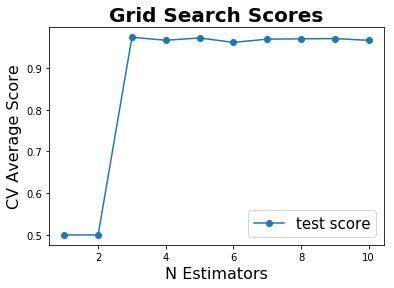

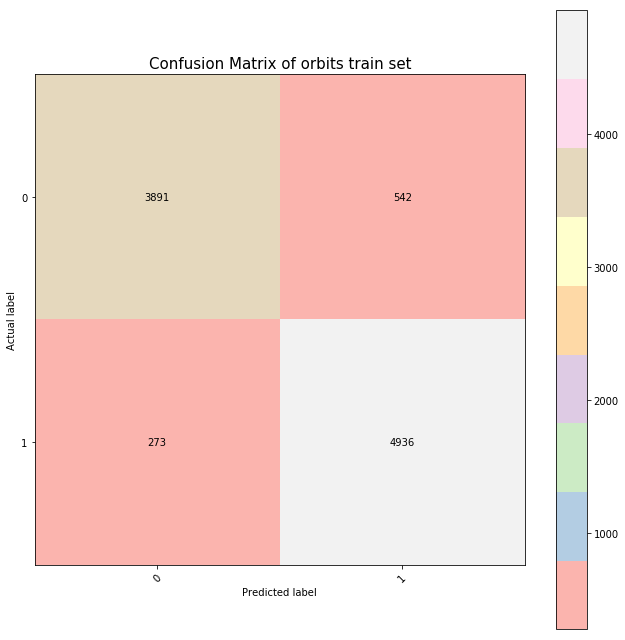

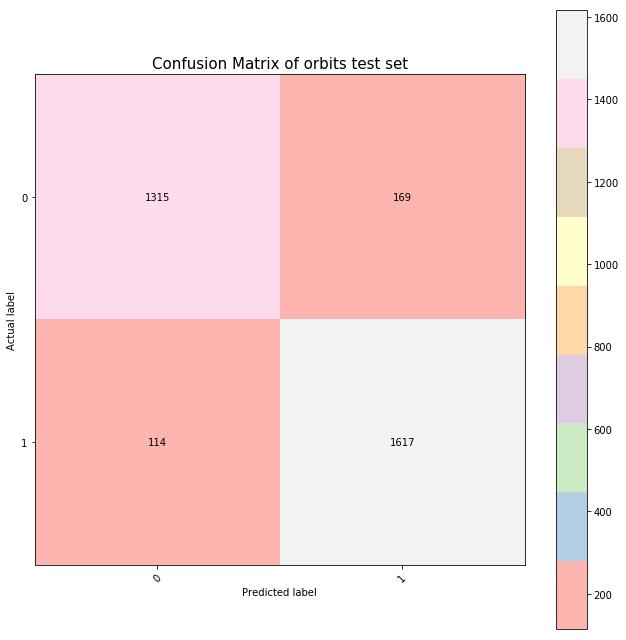

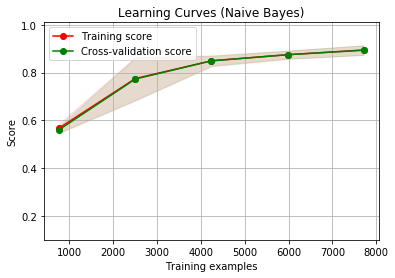

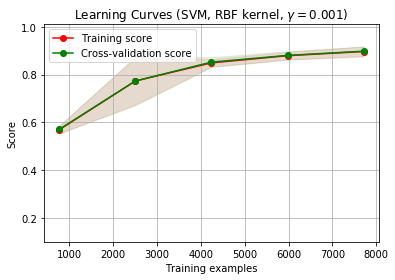

Overall running clock (process time) : 292.751
Overall running time (wall time) : 426.206


/Users/kimtaewoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [82]:
#to run the neural network model and measure the time taken
if __name__ == "__main__":   
    start_clock_neural = time.clock()
    start_time_neural = time.time()
    neural_network(fifa_X_train,fifa_cls_y_train, fifa_X_test,fifa_cls_y_test,"fifa")
    neural_network(finance_X_train,finance_cls_y_train,finance_X_test,fianace_cls_y_test,"finance")
    neural_network(orbits_X_train,orbits_cls_y_train,orbits_X_test,orbits_cls_y_test,"orbits")
    end_clock_neural = time.clock()
    end_time_neural = time.time()   
    print("Overall running clock (process time) :", round(end_clock_neural - start_clock_neural,3))
    print("Overall running time (wall time) :", round(end_time_neural - start_time_neural, 3))